In [1]:
pth = 'INSERT PATH TO REPOSITORY HERE' 
folder = 'raw data/'
figs_folder = 'Figs/'

# Select which molecule to analyze:
PTsample = 'Molecule 1 (TPT)'
analyte = 'TPT'
metal = 'Au'
NPsize = '80 nm'
NPshape = 'NPoM'

In [2]:
import importlib #importlib.reload(ba)
import datetime
import sys
sys.path.insert(1, pth)
import h5py
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# import matplotlib.colors as clrs
# import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import numpy as np
from scipy.signal import find_peaks
# from scipy.signal import peak_widths
# from scipy.signal import savgol_filter
# from scipy.optimize import curve_fit
# from lmfit.models import GaussianModel
# from lmfit import Parameter

from os import listdir
import matplotlib.dates as mdates


import basics as ba
import ERSremoval as ers
import GetDFpeaks as gdfp
import ExpRemoval as exp
import PT_Analysis_new as pt

ba.PrintCurrentDateTime()


C:\Users\aboeh\AppData\Local\Temp\ipykernel_16520\103509543.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


date and time = 31/01/2024 10:06:26


In [4]:
readoutnoiselevel = 300.7
WLcenter=784.8

In [5]:
# colormap = 'nipy_spectral'
sample_list_for_fig = ['ABT-Br-F','NPT','MBN','BPT','Br-BPT','NC-BPT','TPT']
colors = ['#ce62f4ff','#f59b07ff','#ff0047ff','#000080ff','#bdd52dff','#288c6eff','#4575f0ff']
colors_dict = dict(zip(sample_list_for_fig,colors))
sample_color = colors_dict[analyte]

plt.rcParams["font.family"] = 'Calibri'
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({
    "text.usetex": False,
})

cm = 1/2.54  # centimeters in inches

In [6]:
h5file = PTsample + '/' + analyte + '.h5'
fullname = pth + folder + h5file
hdf5filename = h5file.split('.')[0]
with h5py.File(fullname, 'r') as f: 
    print('Measurement sets:',f.keys(),'\n')
    print('Particles:',f['Reference and Background Spectra'].keys())
    
    print('Num particles:',len(f['ParticleScannerScan_0'].keys()))
    print('PT Measurements:',f['ParticleScannerScan_0']['Particle_0'].keys())

Measurement sets: <KeysViewHDF5 ['ParticleScannerScan_0', 'Reference and Background Spectra']> 

Particles: <KeysViewHDF5 ['BG', 'Ref', 'offNPoM']>
Num particles: 151
PT Measurements: <KeysViewHDF5 ['CWL.thumb_image_0', 'SERS_0', 'z_scan_0', 'z_scan_1']>


In [7]:
key = 'offNPoM'

with h5py.File(fullname, 'r') as f:
    group = f['Reference and Background Spectra']
    desc = ba.Desc(group[key])
    power_desc = ba.PowerDesc(desc)
    print(key,desc)
power_desc

offNPoM 2021-12-08 alb214 0.5 mM 1h TPT 120s salted 80nm Au-NPoM
center 294, rows 10
50 uW after Olympus 100x
Grating 2
Motor Steps 87032
Slit 50 um


'50 uw after olympus 100x'

In [8]:
power = 0.05 # mW

In [9]:
# Load Gen_Wn
Gen_Wn_filename = pth + folder + PTsample + '/' + analyte + '_Gen_Wn.csv' 
print(Gen_Wn_filename)
X = ba.LoadGen_Wn(Gen_Wn_filename)

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Molecule 1 (TPT)/TPT_Gen_Wn.csv


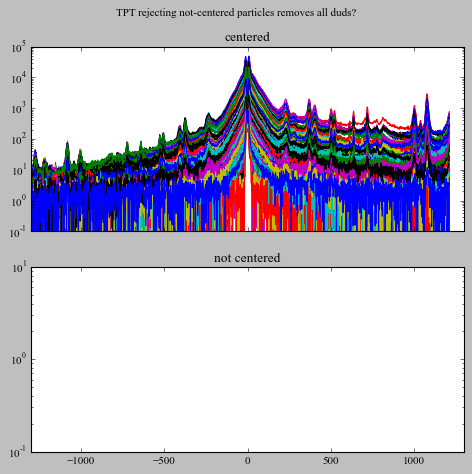

Dataset contains 4 single spectra (instead of timescans)
num in nano 144 num particles 148
148


In [36]:
mode = 'nano'
centered,not_centered = pt.Centered(pth,folder,h5file,analyte,readoutnoiselevel,X,power,
                                    mode=mode,skipsingles=False,
                                    show=True,save=False,testing=False)

print(len(centered.keys()))

[Text(0.5, 1.0, 'centered x-axis calibration?'),
 None,
 (500, 10000),
 (-50.0, 50.0)]

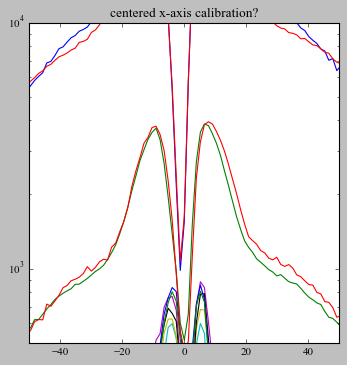

In [60]:
# check x-axis calibration is centered

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
for particle in list(centered.keys())[10:20]:
    ax.plot(X,centered[particle])
ax.set(title='centered x-axis calibration?',yscale='log',ylim=[5*10**2,10**4],xlim=[-50,50])

836
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figs/ave med mn mx 1std/TPT full_dataset


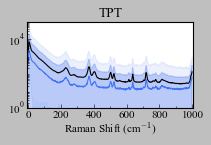

In [61]:
xlim1=[0,1000]
X_cut,M = pt.MakeMatrix(X,centered,xlim1)
print(len(X_cut))
STD,STDnorm,AVE,MED = pt.AveSTD(M)

title = ' full_dataset'
subfolder = figs_folder + 'ave med mn mx 1std/'
print(pth+subfolder+analyte+title)
ylim = [10**0,10**5]#[10**-4,10**6]
pt.PlotAveSTD(X_cut,M,AVE,MED,STD,xlim1,ylim,pth,folder_a,analyte,sample_color,title,show=True,save=False)

[Text(0.5, 1.0, 'duds'), None, (1, 1000)]

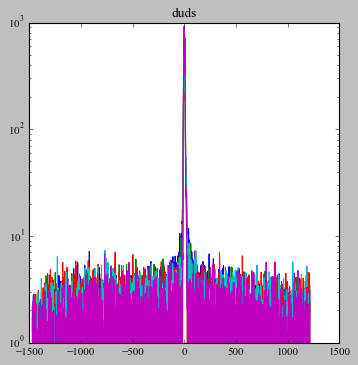

In [65]:
# what percentage are duds (no enhancement)?
lowI = pt.LowI(X,centered,percent=0.04)

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
for particle in lowI.keys():
    ax.plot(X,lowI[particle])
ax.set(title='duds',yscale='log',ylim=[1,10**3])

# ~4%

51 / 148


[Text(0.5, 1.0, 'low I'), None, (1, 10000)]

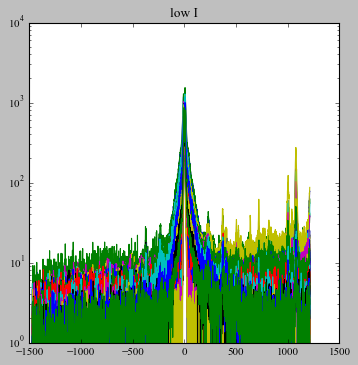

In [88]:
# 1. Select perctile of spectra w intensities that're too low to be useful 
    # (while keeping a large enough number of spectra for statistical analysis)
percent = 0.35

lowI = pt.LowI(X,centered,percent=percent)#56)#0.015)#0.08)
print(len(lowI.keys()),'/',len(centered.keys()))

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
for particle in lowI.keys():
    ax.plot(X,lowI[particle])
ax.set(title='low I',yscale='log',ylim=[1,10**4])

Num remaining spectra: 97


[Text(0.5, 1.0, 'high I'), None, (1, 100000)]

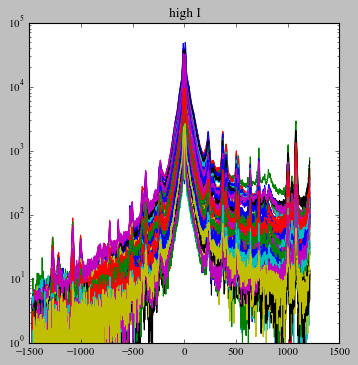

In [89]:
# 2. Keep highest perctile
highI = pt.HighI(X,centered,percent=percent)#56)#0.3)#0.92)
print('Num remaining spectra:',len(highI))

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
for particle in highI.keys():
    ax.plot(X,highI[particle])
ax.set(title='high I',yscale='log',ylim=[1,10**5])

Num remaining spectra: 96


[Text(0.5, 1.0, 'low I'), None, (0.1, 100000)]

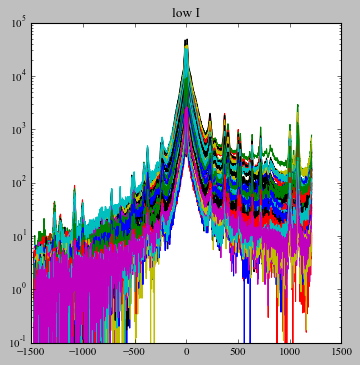

In [90]:
# 3. Select percentile of highI spectra to keep, rejecting spectra outside of it 
lowI = pt.LowI(X,highI,percent=0.99)
print('Num remaining spectra:',len(lowI.keys()))

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
for particle in lowI.keys():
    ax.plot(X,lowI[particle])
ax.set(title='low I',yscale='log',ylim=[0.1,10**5])

In [91]:
# Find any remaining high-intensity outliers manually (using segmenting), and delete them from lowI
i = 0

In [120]:
# Repeat to step through num spectra in increments of 5 spectra
steps = list(range(0,len(lowI.keys()),5))
next = True
if next:
    xlim1 = steps[i]
    xlim2 = steps[i+1]
    i+=1
print(xlim1,xlim2)

65 70


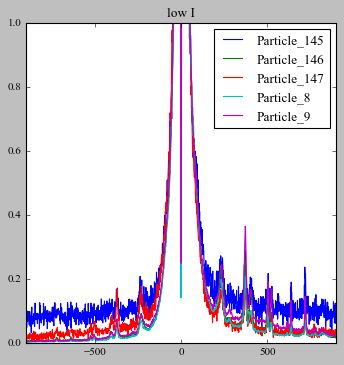

In [121]:
meow =  list(lowI.keys())[xlim1:xlim2]
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
for particle in meow:
#     print(particle)
#     ax.plot(X,NormalizeTo1(lowI[particle]),label=particle)
    region = [50,100]
    ax.plot(X,ba.NormyNormSpecial(X,lowI[particle],region),label=particle)
ax.set(title='low I',yscale='linear',ylim=[0,10**0],xlim=[-900,900])
if len(meow) <= 5:
    ax.legend(loc='best')

In [ ]:
delpars = ['Particle_131',
          ] 

for particle in delpars:
    if particle in lowI.keys():
        del lowI[particle]

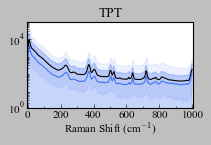

In [127]:
xlim1=[1,1000]
smooth = True
normalize = False
X_cut,M = pt.MakeMatrix(X,lowI,xlim1,smooth=smooth,normalize=normalize)
STD,STDnorm,AVE,MED = pt.AveSTD(M)


title = ' sub_dataset'
ylim = [10**0,10**5]#[10**1,10**5]
pt.PlotAveSTD(X_cut,M,AVE,MED,STD,xlim1,ylim,pth,subfolder,analyte,sample_color,title,show=True,save=False)

# print(pth+subfolder+analyte+title+'.png')

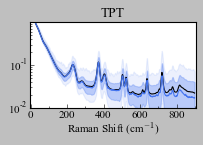

In [128]:
xlim1=[25,900]
smooth = True
normalize = True
X_cut,M = pt.MakeMatrix(X,lowI,xlim1,smooth=smooth,normalize=normalize,testing=False)
STD,STDnorm,AVE,MED = pt.AveSTD(M)

title = ' sub_dataset_norm'
ylim = [10**-2,10**0]
pt.PlotAveSTD(X_cut,M,AVE,MED,STD,[0,xlim1[1]],ylim,pth,subfolder,analyte,sample_color,title,show=True,save=False)

# print(pth+subfolder+analyte+title+'.png')

shape of cut df: (96, 9)
num representative spectra = 95 = 95


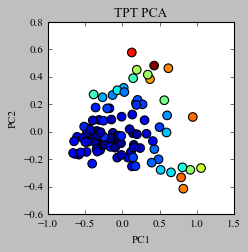

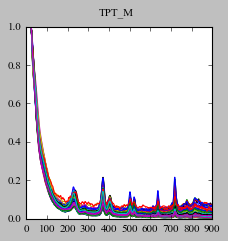

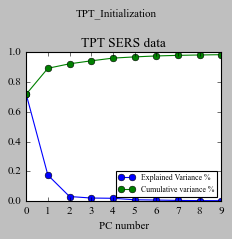

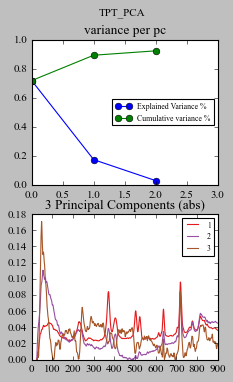

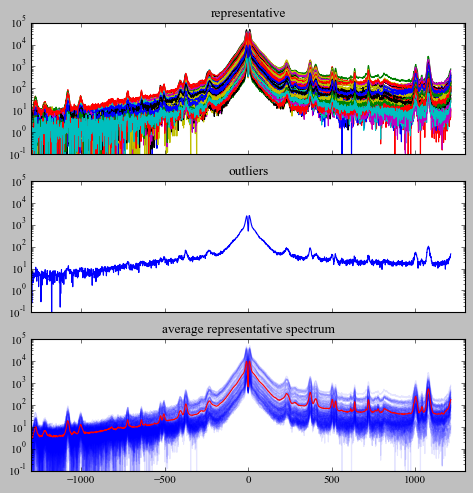

In [129]:
# Remove outlier spectra using Mahalanobis distance
importlib.reload(pt)

percentage = 0.99
representative_spectra = pt.RemoveOutliers(pth,folder,analyte,X,lowI,xlim=xlim1,mode='average',n_components=3,
                                           normalize=normalize,smooth=smooth,
                                           percentage=percentage,plot=True)

TPT
95
148
0.6418918918918919


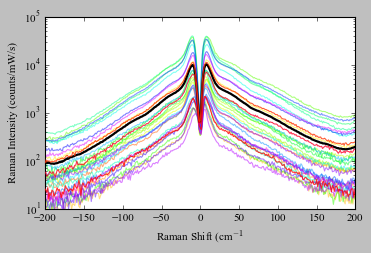

In [131]:
print(analyte)
print(len(representative_spectra))
print(len(centered.keys()))
print(len(representative_spectra)/len(centered.keys()))


xlim = [-200,200]
ylim = [10**1,10**5]
yscale = 'log'
plot_params = (xlim,ylim,yscale)
superselectK = pt.Centermost(30,representative_spectra,X,lowI,plot_params,mode='average',plot=True)

95
15
* *  TPT * *


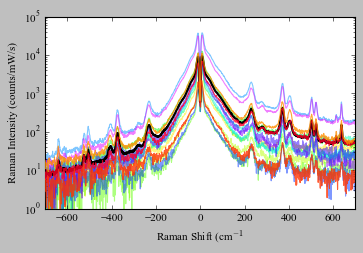

In [133]:
xlim = [-700,700]
ylim = [1,10**5]
yscale = 'log'
plot_params = (xlim,ylim,yscale)
superselectK = pt.Centermost(15,representative_spectra,X,lowI,plot_params,mode='average',plot=True)

print(len(representative_spectra))
print(len(superselectK))
print('* * ',analyte,'* *')

In [134]:
print(len(representative_spectra))
print(len(superselectK))

95
15


In [136]:
print(ba.SortParticles(superselectK))

['Particle_3', 'Particle_22', 'Particle_56', 'Particle_68', 'Particle_83', 'Particle_87', 'Particle_103', 'Particle_105', 'Particle_107', 'Particle_111', 'Particle_122', 'Particle_127', 'Particle_135', 'Particle_141', 'Particle_146']


In [137]:
# # print(sample,metal)
# # if 'NDoM' in sample:
# #     name = sample.split('_')[0] + ' ' + metal + '-' + sample.split('_')[1]
# # else:
# #     name = sample + '-' + 'NPoM'
# # print(name)
# name = sample

# # store spectra before ERS removal
# for particle in superselectK:
#     nanocavity_ave =  centered[particle]
    
# #     csvfilename = pth + folder + 'CSVs/Before ERS removal/BPT NPoM_' + particle + '_beforeERSremoval.csv'
#     csvfilename ='C:/Users/aboeh/OneDrive/Documents/Python Scripts/ERS paper figs/CSVs/Before ERS removal/' + \
#                     name + '/' + particle + '_beforeERSremoval.csv'
# #     print(csvfilename)
#     exportasCSV2(X,nanocavity_ave,csvfilename)

In [138]:
# # store raw spectra

# print(h5file)
# pt.StoreRawNano(pth,folder,h5file,name,superselectK,readoutnoiselevel,X,power,
#                 threshold=0.05,mode='nano',skipsingles=True,show=True)


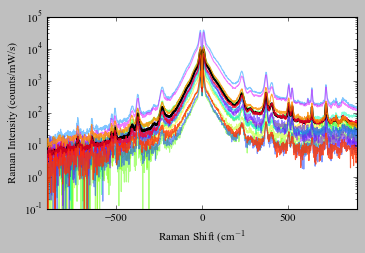

In [140]:
xlim = [-900,900]
ylim = [0.1,10**5]
yscale = 'log'
plot_params = (xlim,ylim,yscale)
superselectK = pt.Centermost(15,representative_spectra,X,lowI,plot_params,mode='average',plot=True)

smooth = True
normalize = False
X_cut,M = pt.MakeMatrix(X,lowI,[1,xlim1[1]],smooth=smooth,normalize=normalize)
STD,STDnorm,AVE,MED = pt.AveSTD(M)

# i1 = ba.FindIndexX(1,X)
# i2 = ba.FindIndexX(xlim1[1],X)

C:\Users\aboeh\OneDrive\Documents\Python Scripts for Github\PT_Analysis_new_forGithub.py:898: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  #ax.legend(loc='best',fontsize=9)


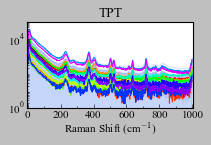

In [142]:
xlim1=[1,1000]
# ylim = [10**0,10**5]#[10**1,10**5]
smooth = True
normalize = False
i1 = ba.FindIndexX(xlim1[0],X)
i2 = ba.FindIndexX(xlim1[1],X)

X_cut,M = pt.MakeMatrix(X,lowI,xlim1,smooth=smooth,normalize=normalize)
STD,STDnorm,AVE,MED = pt.AveSTD(M)

select_spectra = {}

title = ' sub_dataset_w_superselectK'
# ylim = [10**0,10**5]
Kcut = {}
# colors = CreateColorsList(len(superselectK))
for particle in superselectK:
    if normalize:
        Kcut[particle] = NormyNormSpecial(X_cut,lowI[particle][i1:i2],[-100,100])
        ylim = [10**-2,10**0]
        title = ' sub_dataset_w_superselectK' + '_norm'
    else:
        Kcut[particle] = lowI[particle][i1:i2]
        #ylim = [10**1,10**4]#[10**0,10**5]
        ylim = [10**0,10**5]#[10**1,10**5]
        title = ' sub_dataset_w_superselectK'
    select_spectra[particle] = lowI[particle]
pt.PlotAveSTDwSelectK(X_cut,M,AVE,MED,STD,Kcut,xlim1,ylim,pth,subfolder,analyte,sample_color,title,show=True,save=False)

C:\Users\aboeh\OneDrive\Documents\Python Scripts for Github\PT_Analysis_new_forGithub.py:843: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  #ax.legend(loc='best',fontsize=9)


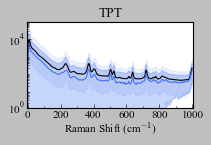

In [143]:
xlim1=[1,1000]
smooth = True
normalize = False
X_cut,M = pt.MakeMatrix(X,select_spectra,xlim1,smooth=smooth,normalize=normalize)
STD,STDnorm,AVE,MED = pt.AveSTD(M)


title = ' select dataset'
# folder_a = 'Thesis figures/Chapter 5/ave med mn mx 1std/'
# print(pth+folder_a+sample+title)
ylim = [10**0,10**5]#[10**1,10**5]
pt.PlotAveSTD(X_cut,M,AVE,MED,STD,xlim1,ylim,pth,subfolder,analyte,sample_color,title,show=True,save=False)

TPT
[1, 1000]


C:\Users\aboeh\OneDrive\Documents\Python Scripts for Github\PT_Analysis_new_forGithub.py:898: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  #ax.legend(loc='best',fontsize=9)


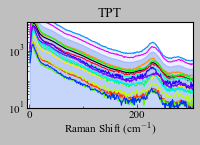

In [145]:
print(analyte)
print(xlim1) 
title = ' sub_dataset_w_superselectK'
# ylim = [10**0,10**5]
Kcut = {}
# colors = CreateColorsList(len(superselectK))
for particle in superselectK:
    if normalize:
        Kcut[particle] = NormyNormSpecial(X_cut,lowI[particle][i1:i2],[-100,100])
        ylim = [10**-2,10**0]
        title = ' sub_dataset_w_superselectK' + '_norm'
    else:
        Kcut[particle] = lowI[particle][i1:i2]
        ylim = [10**1,10**4]#[10**0,10**5]
        title = ' sub_dataset_w_superselectK'
pt.PlotAveSTDwSelectK(X_cut,M,AVE,MED,STD,Kcut,[0,300],ylim,pth,subfolder,analyte,sample_color,title,show=True,save=False)

In [146]:
plt.close('all')

In [155]:
importlib.reload(gdfp)

<module 'GetDFpeaks_forGithub' from 'C:\\Users\\aboeh\\OneDrive\\Documents\\Python Scripts for Github\\GetDFpeaks_forGithub.py'>

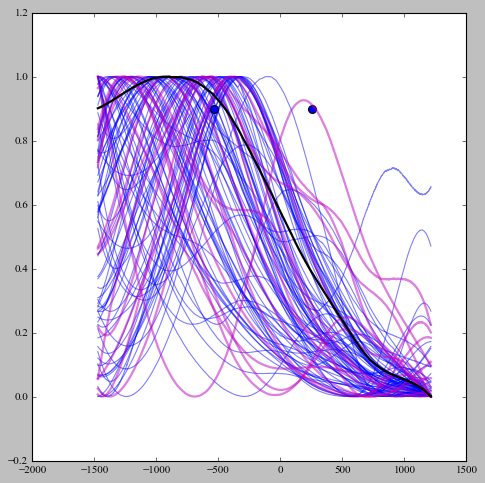

In [156]:
# highest_X_1,2: peak1 is highest peak, peak2 is the other one
# DF_X_1,2    :  peak1 is lower Raman Shift

# Average DF spectrum
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(7,7))#,gridspec_kw={'width_ratios': [3, 1]})
colors = ba.CreateColorsList(len(superselectK))
# DF_dict = {}
highest_X_1 = []
highest_X_2 = []
DF_X_1 = []
DF_X_2 = []
DF_fwhm_1 = []
DF_fwhm_2 = []
total = np.zeros(len(X))
for p,particle in enumerate(representative_spectra):
    if particle in superselectK:
        color = 'm'
        lw = 2
        zorder = 2
    else:
        color = 'b'
        lw = 1
        zorder = 1
    xpeaks,fwhms = gdfp.GetDF_peakmaxfwhm_1particle(pth+folder,h5file,X,particle,readoutnoiselevel,testing=False)
#     DF_dict[particle] = xpeaks

    if len(xpeaks) > 0:
        highest_X_1.append(xpeaks[0])
        if len(xpeaks) > 1:
            highest_X_2.append(xpeaks[1])

        #xpeaks = sorted(xpeaks)
        xpeaks_new,fwhms_new = gdfp.SortByX(xpeaks,fwhms)

        DF_X_1.append(xpeaks_new[0])
        DF_fwhm_1.append(fwhms_new[0])
        if len(xpeaks) > 1:
            DF_X_2.append(xpeaks_new[1])
            DF_fwhm_2.append(fwhms_new[1])

        DF_spectrum = gdfp.GetDF_spectrum_1particle(pth,folder+h5file,X,particle,readoutnoiselevel)
        total += DF_spectrum
        ax.plot(X,ba.NormalizeTo1(DF_spectrum),color=color,alpha=0.5,lw=lw,zorder=zorder)#colors[p])
    else:
        print(particle,xpeaks)
    
ave_X_1 = np.mean(DF_X_1)
ave_X_2 = np.mean(DF_X_2)
ave_fwhm_1 = np.mean(DF_fwhm_1)
ave_fwhm_2 = np.mean(DF_fwhm_2)
ave_xpeaks = [ave_X_1,ave_X_2]
ave_fwhms = [ave_fwhm_1,ave_fwhm_2]
averageDF = total / p #len(superselectK)

ax.plot(X,ba.NormalizeTo1(averageDF),color='k',lw=2)
# ax.scatter(ave_xpeaks,[0.01,0.01],marker='x')
ax.scatter(ave_xpeaks,np.ones(len(ave_xpeaks))*0.9,marker='o',s=50) #*max(averageDF)

DF_representative_particles = [DF_X_1,DF_X_2]
DFpeaks_representative_particles = [ave_X_1,ave_X_2]

DFhighestpeaks_representative_particles = [np.mean(highest_X_1),np.mean(highest_X_2)]

In [157]:
print(ave_fwhm_1,ave_fwhm_2)

939.9473059833077 840.0207211893157


amp0 5748.170835318245 ampfit <Parameter 'amplitude', value=395.90677436635684 +/- 54.8, bounds=[0:inf]>
mu0 751.4068418661643 mufit <Parameter 'center', value=751.9758623912583 +/- 2.17, bounds=[651.4068418661643:851.4068418661643]>
sigma0 127.39935450993715 sigmafit <Parameter 'sigma', value=13.839624648217626 +/- 2.29, bounds=[10.616612875828096:382.19806352981146]>
highest peak mu 751.9758623912583 

amp0 4790.142362765204 ampfit <Parameter 'amplitude', value=331.75256418172637 +/- 46.7, bounds=[0:inf]>
mu0 752.4631027385672 mufit <Parameter 'center', value=751.83566545439 +/- 2.2, bounds=[652.4631027385672:852.4631027385672]>
sigma0 127.39935450993715 sigmafit <Parameter 'sigma', value=13.814794353108084 +/- 2.34, bounds=[10.616612875828096:382.19806352981146]>
peak1 mu 751.83566545439 

amp0 3512.771066027816 ampfit <Parameter 'amplitude', value=301.8204678688098 +/- 67.4, bounds=[0:inf]>
mu0 805.0240701519419 mufit <Parameter 'center', value=804.1812364894231 +/- 4.56, bounds=[7

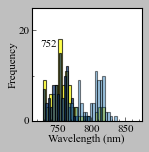

In [164]:
Title = 'DF peaks of particles in representative spectra of ' + analyte

colors = ba.CreateColorsList(3,colormap='Blues_r')
fig,ax = plt.subplots(figsize=(4.5*cm,4.5*cm))#(2.8,2.8)) #6.8

nbins = 20

n,bins,patches = ax.hist(ba.WNtoWL(highest_X_1,WLcenter),alpha=0.7,label='peak 1',color='yellow',bins=nbins)
mu,Gen_X,peak_eval = pt.FitGauss(bins[:-1],n)
highest_peak = mu
print('highest peak mu',mu,'\n')
# ax.plot(Gen_X,peak_eval,color='yellow',lw=3)
ax.text(highest_peak-15,max(peak_eval)+5,str(round(highest_peak)),ha='center')

n,bins,patches = ax.hist(ba.WNtoWL(DF_representative_particles[0],WLcenter),alpha=0.7,label='peak 1',color=colors[0],bins=nbins)
# print(len(n),len(bins[:-1]))
mu,Gen_X,peak_eval = pt.FitGauss(bins[:-1],n)
DFpeak1 = mu
print('peak1 mu',DFpeak1,'\n')
# ax.plot(Gen_X,peak_eval,color=colors[0],lw=3)
# ax.text(DFpeak1-15,max(peak_eval)+5,str(round(DFpeak1)),ha='center')

n,bins,patches = ax.hist(ba.WNtoWL(DF_representative_particles[1],WLcenter),alpha=0.5,label='peak 2',color=colors[1],bins=nbins)
mu2,Gen_X,peak_eval = pt.FitGauss(bins[:-1],n)
print('peak2 mu',mu2,'\n')
# ax.plot(Gen_X,peak_eval,color=colors[1],lw=3)
# ax.text(mu2,max(peak_eval)+5,str(round(mu2)),ha='center')

ax.set(#title=Title,
       xlim=[ba.Lam(-1300,WLcenter),ba.Lam(1300,WLcenter)],#xlim=[-1300,1300],
       ylim = [0,25],
       xlabel='Wavelength (nm)',ylabel='Frequency') #'Raman Shift (cm$^{-1}$)'
# ax.legend(loc='best',fontsize=9,frameon=False)

ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', which='major', pad=2)
#     ax.set(ylabel='Manhattan Distance',xlabel='Spectral Region')# (cm$^{-1}$)')
ax.xaxis.labelpad = 0.5
ax.yaxis.labelpad = 0.5

filename = pth + figs_folder + 'DF/' + Title + '.png'
print(filename)
ba.ensure_dir(filename)
# plt.savefig(filename,format='png',bbox_inches='tight',transparent=True)

DFhistpeaks_representative_particles = [DFpeak1,mu2]


amp0 5748.170835318245 ampfit <Parameter 'amplitude', value=395.90677436635684 +/- 54.8, bounds=[0:inf]>
mu0 751.4068418661643 mufit <Parameter 'center', value=751.9758623912583 +/- 2.17, bounds=[651.4068418661643:851.4068418661643]>
sigma0 127.39935450993715 sigmafit <Parameter 'sigma', value=13.839624648217626 +/- 2.29, bounds=[10.616612875828096:382.19806352981146]>
highest peak mu 751.9758623912583 

amp0 4790.142362765204 ampfit <Parameter 'amplitude', value=331.75256418172637 +/- 46.7, bounds=[0:inf]>
mu0 752.4631027385672 mufit <Parameter 'center', value=751.83566545439 +/- 2.2, bounds=[652.4631027385672:852.4631027385672]>
sigma0 127.39935450993715 sigmafit <Parameter 'sigma', value=13.814794353108084 +/- 2.34, bounds=[10.616612875828096:382.19806352981146]>
peak1 mu 751.83566545439 

amp0 3512.771066027816 ampfit <Parameter 'amplitude', value=301.8204678688098 +/- 67.4, bounds=[0:inf]>
mu0 805.0240701519419 mufit <Parameter 'center', value=804.1812364894231 +/- 4.56, bounds=[7

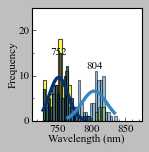

In [168]:
Title = 'DF peaks of particles in representative spectra of ' + analyte

colors = ba.CreateColorsList(3,colormap='Blues_r')
fig,ax = plt.subplots(figsize=(4.5*cm,4.5*cm))#(2.8,2.8)) #6.8

nbins = 20

n,bins,patches = ax.hist(ba.WNtoWL(highest_X_1,WLcenter),alpha=0.7,label='peak 1',color='yellow',bins=nbins)
mu,Gen_X,peak_eval = pt.FitGauss(bins[:-1],n)
highest_peak = mu
print('highest peak mu',mu,'\n')


n,bins,patches = ax.hist(ba.WNtoWL(DF_representative_particles[0],WLcenter),alpha=0.7,label='peak 1',color=colors[0],bins=nbins)
# print(len(n),len(bins[:-1]))
mu,Gen_X,peak_eval = pt.FitGauss(bins[:-1],n)
DFpeak1 = mu
print('peak1 mu',DFpeak1,'\n')
ax.plot(Gen_X,peak_eval,color=colors[0],lw=3)
ax.text(DFpeak1,max(peak_eval)+5,str(round(DFpeak1)),ha='center')

n,bins,patches = ax.hist(ba.WNtoWL(DF_representative_particles[1],WLcenter),alpha=0.5,label='peak 2',color=colors[1],bins=nbins)
mu2,Gen_X,peak_eval = pt.FitGauss(bins[:-1],n)
print('peak2 mu',mu2,'\n')
ax.plot(Gen_X,peak_eval,color=colors[1],lw=3)
ax.text(mu2,max(peak_eval)+5,str(round(mu2)),ha='center')

ax.set(#title=Title,
       xlim=[ba.Lam(-1300,WLcenter),ba.Lam(1300,WLcenter)],#xlim=[-1300,1300],
       ylim = [0,25],
       xlabel='Wavelength (nm)',ylabel='Frequency') #'Raman Shift (cm$^{-1}$)'
# ax.legend(loc='best',fontsize=9,frameon=False)

ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', which='major', pad=2)
#     ax.set(ylabel='Manhattan Distance',xlabel='Spectral Region')# (cm$^{-1}$)')
ax.xaxis.labelpad = 0.5
ax.yaxis.labelpad = 0.5

filename = pth + figs_folder + 'DF/' + Title + '.png'
print(filename)
ba.ensure_dir(filename)
# plt.savefig(filename,format='png',bbox_inches='tight',transparent=True)

DFhistpeaks_representative_particles = [DFpeak1,mu2]


amp0 5748.170835318245 ampfit <Parameter 'amplitude', value=395.90677436635684 +/- 54.8, bounds=[0:inf]>
mu0 751.4068418661643 mufit <Parameter 'center', value=751.9758623912583 +/- 2.17, bounds=[651.4068418661643:851.4068418661643]>
sigma0 127.39935450993715 sigmafit <Parameter 'sigma', value=13.839624648217626 +/- 2.29, bounds=[10.616612875828096:382.19806352981146]>

 peak1 mu 751.9758623912583 

amp0 3832.113890212163 ampfit <Parameter 'amplitude', value=432.27516044602146 +/- 89.9, bounds=[0:inf]>
mu0 807.7864851176208 mufit <Parameter 'center', value=799.3304587346887 +/- 5.83, bounds=[707.7864851176208:907.7864851176208]>
sigma0 127.39935450993715 sigmafit <Parameter 'sigma', value=25.39778213618072 +/- 6.56, bounds=[10.616612875828096:382.19806352981146]>

 peak2 mu 799.3304587346887 

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Molecule 1 (TPT)/TPT Highest two DF peaks of particles in representative spectra of TPT.png


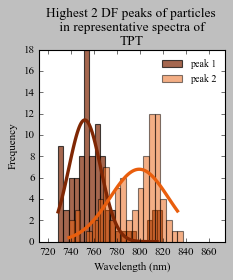

In [171]:
# highest_X_1
# highest_X_2

title = 'Highest two DF peaks of particles in representative spectra of ' + analyte

colors = ba.CreateColorsList(3,colormap='Oranges_r')
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(3,3))

nbins = 20

n,bins,patches = ax.hist(ba.WNtoWL(highest_X_1,WLcenter),alpha=0.7,label='peak 1',color=colors[0],bins=nbins)
# print(len(n),len(bins[:-1]))

mu1,Gen_X,peak_eval = pt.FitGauss(bins[:-1],n)
# DFpeak1 = mu
print('\n peak1 mu',mu1,'\n')

ax.plot(Gen_X,peak_eval,color=colors[0],lw=3)

n,bins,patches = ax.hist(ba.WNtoWL(highest_X_2,WLcenter),alpha=0.5,label='peak 2',color=colors[1],bins=nbins)
mu2,Gen_X,peak_eval = pt.FitGauss(bins[:-1],n)
print('\n peak2 mu',mu2,'\n')

ax.plot(Gen_X,peak_eval,color=colors[1],lw=3)

ax.set(title='Highest 2 DF peaks of particles \n in representative spectra of \n' + analyte,
       xlim=[ba.Lam(-1300,WLcenter),ba.Lam(1300,WLcenter)],#xlim=[-1300,1300],
       xlabel='Wavelength (nm)',ylabel='Frequency') #'Raman Shift (cm$^{-1}$)'
ax.legend(loc='best',fontsize=9,frameon=False)

filename = pth + folder + 'Figs/' + hdf5filename.split('.')[0] + ' ' + title + '.png'
print(filename)
# ba.ensure_dir(filename)
# plt.savefig(filename,format='png',bbox_inches='tight',transparent=True)

# DFhighestpeaks_representative_particles = [np.mean(highest_X_1),np.mean(highest_X_2)]
DFhighestpeaks_histpeaks_representative_particles = [mu1,mu2]


In [173]:
# * 
# Compare ave DF peak positions of all representative spectra and their hist fits
print('by peak position')
# print('peak mxs',DFpeaks_representative_particles)
print('peak mxs',ba.Lam(DFpeaks_representative_particles[0],WLcenter),ba.Lam(DFpeaks_representative_particles[1],WLcenter))
print('hist fits',DFhistpeaks_representative_particles)


print('\n by peak intensity')
# print('peak mxs',DFhighestpeaks_representative_particles)
print('peak mxs',ba.Lam(DFhighestpeaks_representative_particles[0],WLcenter),ba.Lam(DFhighestpeaks_representative_particles[1],WLcenter))
print('hist fits',DFhighestpeaks_histpeaks_representative_particles)

by peak position
peak mxs 753.2290716932904 800.5616276865726
hist fits [751.83566545439, 804.1812364894231]

 by peak intensity
peak mxs 758.854575695967 793.3201232596745
hist fits [751.9758623912583, 799.3304587346887]


In [109]:
# fit centermost spectra

In [180]:
len(superselectK)

15

2048 2035
1401
500.0 499.08087748555937


634

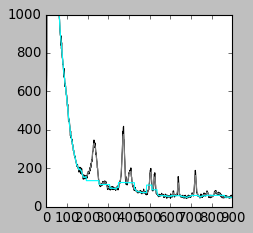

In [179]:
#test
ave = centered[superselectK[0]]
Y_bg_smthd = ba.ReduceNoise(X,ave,9,cutoff = 5000)
peak_params = [.5,5.,0.1] # prominence,half width,height
X_bg,Y_bg = ers.SpectrumWithoutPeaks(X,Y_bg_smthd,peak_params,9,testing=False) 
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(3,3))
ax.plot(X,ave,color='k')
ax.plot(X,Y_bg_smthd,color='grey')
ax.plot(X_bg,Y_bg,color='cyan')
ax.set(xlim=[0,900],ylim=[0,1000])

print(len(ave),len(Y_bg))

loww = 500.
# zi = FindIndexX(meowies,X_bg)
zi = ba.FindClosesetXbelow_w(loww,X_bg)
print(zi)
print(loww,X_bg[zi])

len(X_bg[zi:])

In [150]:
importlib.reload(ers)

<module 'ERSremoval_v34' from 'C:\\Users/aboeh/OneDrive/Documents/Python Scripts\\ERSremoval_v34.py'>

In [181]:
ERS_dict = {}
ERS_params_dict = {}
ERS_initial_params_dict = {}

Particle_141
Particle_141
rmse: 0.09405758921431703
all DF peaks_x in GetDFpeaks [-799.4642474797283, -24.745999159731536]
DF peaks_x sorted in GetDFpeaks [-799.4642474797283, -24.745999159731536]
DF x_peaks_final in GetDFpeaks [-799.4642474797283, -24.745999159731536] 



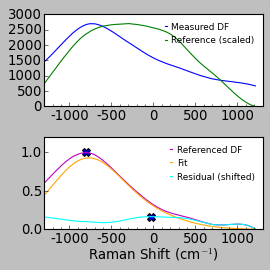

500 499.08087748555937
initial cost 0.5099759920266533 final_cost 0.42066418927073423
Running simulated annealing again with same settings to get second result.
Final cost 0.42066418927073423
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_141_1fittingERS_v34.png
Particle_107
Particle_107
rmse: 0.22429491285920136
all DF peaks_x in GetDFpeaks [-1312.4209887507523, -489.03376543711596]
DF peaks_x sorted in GetDFpeaks [-1312.4209887507523, -489.03376543711596]
DF x_peaks_final in GetDFpeaks [-489.03376543711596] 



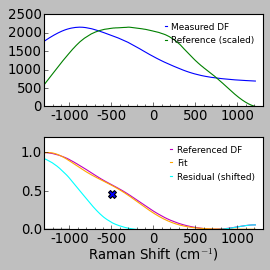

500 499.08087748555937
initial cost 0.2561114115965168 final_cost 0.21488891198765794
Running simulated annealing again with same settings to get second result.
Final cost 0.21243324275534994
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_107_1fittingERS_v34.png
Particle_146
Particle_146
rmse: 0.2501421379383494
all DF peaks_x in GetDFpeaks [-553.9320552785814, 349.9223624461443]
DF peaks_x sorted in GetDFpeaks [-553.9320552785814, 349.9223624461443]
DF x_peaks_final in GetDFpeaks [-553.9320552785814, 349.9223624461443] 



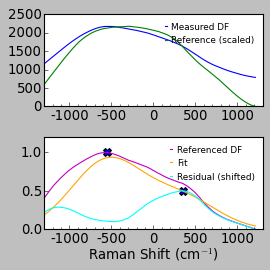

500 499.08087748555937
initial cost 0.6861147061875572 final_cost 0.5338891351989924
Running simulated annealing again with same settings to get second result.
Final cost 0.5338891351989924
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_146_1fittingERS_v34.png
Particle_105
Particle_105
rmse: 0.14163664334583084
all DF peaks_x in GetDFpeaks [-632.3797291060936, -26.051166270767634]
DF peaks_x sorted in GetDFpeaks [-632.3797291060936, -26.051166270767634]
DF x_peaks_final in GetDFpeaks [-632.3797291060936, -26.051166270767634] 



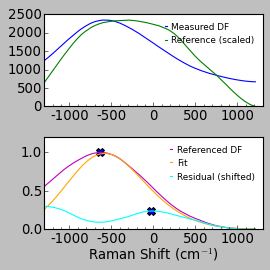

500 499.08087748555937
initial cost inf final_cost inf
Allowing all Gaussian centers to vary by -400 cm-1 from extracted DF peak position and mx height bc cost was too high.
Initial cost inf Final cost inf

 
 Changing region from  -1200 - -550
to                    -1100.0 - -600.0
500 499.08087748555937
Shifting Abound1 down from 29.432227421454392
to 26.48900467930895
New A0 = 26.589004679308953
Initial cost inf Final cost 0.3267106380590195

 
 Failed again, trying for 3rd time now
Shifting Abound1 down from 26.48900467930895
to 23.830104211378057
New A0 = 23.930104211378058
Initial cost inf Final cost 0.31254988359104896
Running simulated annealing again with same settings to get second result.
Final cost 0.31254988359104896
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_105_1fittingERS_v34.png
Particle_83
Particle_83
rmse: 0.06584203592335841
all DF peaks_x in GetDFpeaks [-925.6812857152154, -241.1615142950629]
DF peaks_x sorted 

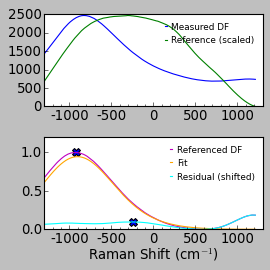

500 499.08087748555937
initial cost inf final_cost inf
Allowing all Gaussian centers to vary by -400 cm-1 from extracted DF peak position and mx height bc cost was too high.
Initial cost inf Final cost inf

 
 Changing region from  -1200 - -550
to                    -1100.0 - -600.0
500 499.08087748555937
Shifting Abound1 down from 15.941897285884126
to 14.347707557295713
New A0 = 14.447707557295713
Initial cost inf Final cost 0.2280744244724128

 
 Failed again, trying for 3rd time now
Shifting Abound1 down from 14.347707557295713
to 12.902936801566142
New A0 = 13.002936801566142
Initial cost inf Final cost 0.22318954707854438
Running simulated annealing again with same settings to get second result.
Final cost 0.22318954707854438
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_83_1fittingERS_v34.png
Particle_111
Particle_111
rmse: 0.07937229278755469
all DF peaks_x in GetDFpeaks [-1202.4103517322098, -419.2180500194099]
DF peaks_x sor

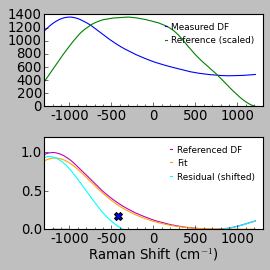

500 499.08087748555937
initial cost inf final_cost 0.19267588753016326
Running simulated annealing again with same settings to get second result.
Final cost 0.19267588753016326
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_111_1fittingERS_v34.png
Particle_127
Particle_127
rmse: 0.1083397845445414
all DF peaks_x in GetDFpeaks [-1265.065740248549, 536.0989029717373, -674.1210818776897]
DF peaks_x sorted in GetDFpeaks [-1265.065740248549, 536.0989029717373, -674.1210818776897]
DF x_peaks_final in GetDFpeaks [536.0989029717373, -674.1210818776897] 



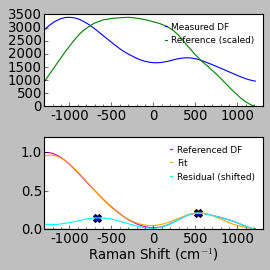

500 499.08087748555937
initial cost 0.7083537126056836 final_cost 0.6588386286499446
Running simulated annealing again with same settings to get second result.
Final cost 0.6542965642723384
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_127_1fittingERS_v34.png
Particle_68
Particle_68
rmse: 0.08783287293818738
all DF peaks_x in GetDFpeaks [-366.6575104802875, 322.85163535546036]
DF peaks_x sorted in GetDFpeaks [-366.6575104802875, 322.85163535546036]
DF x_peaks_final in GetDFpeaks [-366.6575104802875, 322.85163535546036] 



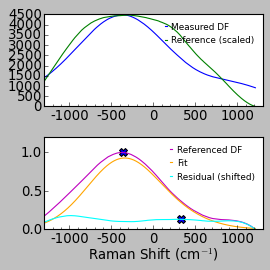

500 499.08087748555937
initial cost 0.39148091394256196 final_cost 0.34556150289982346
Running simulated annealing again with same settings to get second result.
Final cost 0.34412566842974185
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_68_1fittingERS_v34.png
Particle_103
Particle_103
rmse: 0.2525081152036202
all DF peaks_x in GetDFpeaks [-406.73073937433713, 475.07695555659967]
DF peaks_x sorted in GetDFpeaks [-406.73073937433713, 475.07695555659967]
DF x_peaks_final in GetDFpeaks [-406.73073937433713, 475.07695555659967] 



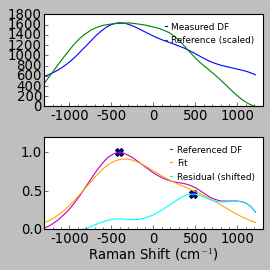

500 499.08087748555937
initial cost 0.40584420604934685 final_cost 0.39837267630052525
Running simulated annealing again with same settings to get second result.
Final cost 0.39837267630052525
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_103_1fittingERS_v34.png
Particle_22
Particle_22
rmse: 0.24700784428033293
all DF peaks_x in GetDFpeaks [-1146.4902772278435, -134.01396994124815]
DF peaks_x sorted in GetDFpeaks [-1146.4902772278435, -134.01396994124815]
DF x_peaks_final in GetDFpeaks [-134.01396994124815] 



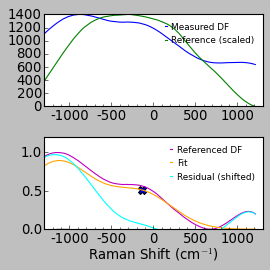

500 499.08087748555937
initial cost 0.4283791745865675 final_cost 0.36910608442601456
Running simulated annealing again with same settings to get second result.
Final cost 0.36233809729151767
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_22_1fittingERS_v34.png
Particle_122
Particle_122
rmse: 0.235733942241196
all DF peaks_x in GetDFpeaks [-559.605912417049, 282.0179796382102, -633.8147188051109]
DF peaks_x sorted in GetDFpeaks [-559.605912417049, 282.0179796382102, -633.8147188051109]
DF x_peaks_final in GetDFpeaks [-559.605912417049, 282.0179796382102, -633.8147188051109] 



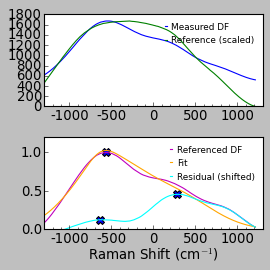

500 499.08087748555937
initial cost 1.3293017658689585 final_cost 0.992454673860057
Running simulated annealing again with same settings to get second result.
Final cost 0.992454673860057
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_122_1fittingERS_v34.png
Particle_87
Particle_87
rmse: 0.03288183275321111
all DF peaks_x in GetDFpeaks [-632.3797291060936, 81.35441440902632]
DF peaks_x sorted in GetDFpeaks [-632.3797291060936, 81.35441440902632]
DF x_peaks_final in GetDFpeaks [-632.3797291060936, 81.35441440902632] 



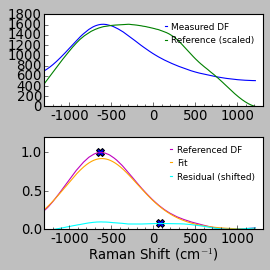

500 499.08087748555937
initial cost 0.21930649334944993 final_cost 0.19931616058956259
Running simulated annealing again with same settings to get second result.
Final cost 0.18371834180633076
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_87_1fittingERS_v34.png
Particle_3
Particle_3
rmse: 0.48069069737024817
all DF peaks_x in GetDFpeaks [-1472.5544528085193, 186.92290445292298]
DF peaks_x sorted in GetDFpeaks [-1472.5544528085193, 186.92290445292298]
DF x_peaks_final in GetDFpeaks [186.92290445292298] 



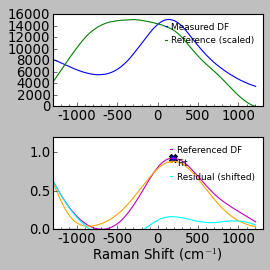

500 499.08087748555937
initial cost 0.5515314709304865 final_cost 0.43131903872808736
Running simulated annealing again with same settings to get second result.
Final cost 0.43131903872808736
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_3_1fittingERS_v34.png
Particle_56
Particle_56
rmse: 0.1050068579719916
all DF peaks_x in GetDFpeaks [-1472.5544528085193, -774.5006504973262, 290.70260638019005]
DF peaks_x sorted in GetDFpeaks [-1472.5544528085193, -774.5006504973262, 290.70260638019005]
DF x_peaks_final in GetDFpeaks [-774.5006504973262, 290.70260638019005] 



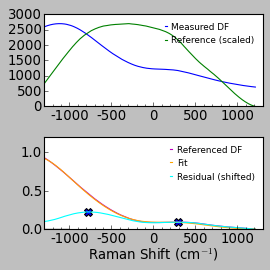

500 499.08087748555937
initial cost 0.47904398729520153 final_cost 0.39713253228764095
Running simulated annealing again with same settings to get second result.
Final cost 0.39713253228764095
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_56_1fittingERS_v34.png
Particle_135
Particle_135
rmse: 0.11797425325514854
all DF peaks_x in GetDFpeaks [-1261.9198423301575, 537.2892499847326, -707.4136972893866]
DF peaks_x sorted in GetDFpeaks [-1261.9198423301575, 537.2892499847326, -707.4136972893866]
DF x_peaks_final in GetDFpeaks [537.2892499847326, -707.4136972893866] 



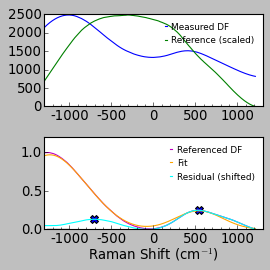

500 499.08087748555937
initial cost 1.160002402894086 final_cost 1.0817120125602566
Running simulated annealing again with same settings to get second result.
Final cost 1.0652926631701771
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/ERSfit/v34/TPT_Particle_135_1fittingERS_v34.png


In [183]:
df_testing = True
ers_testing = False


for p,particle in enumerate(superselectK): #superselectK):
# for p,particle in enumerate(['Particle_457']):
    print(particle)
    ave = centered[particle]

    # ~    DF    ~    DF    ~    DF    ~
#     WL = DF_dict[particle]
#     DF_peaks_x,DF_fwhms = GetDF_peakmaxfwhm_1particle(X,WL,key,testing=df_testing)
    DF_peaks_x,DF_fwhms = gdfp.GetDF_peakmaxfwhm_1particle(pth,folder+h5file,X,particle,readoutnoiselevel,
                                                           thirdround=True,
                                                           testing=df_testing)
    DF_spectrum = gdfp.GetDF_spectrum_1particle(pth,folder+h5file,X,particle,readoutnoiselevel)
#                     if df_testing == True:
#                         print('DF peak positions',DF_peaks_x)
    # ~    DF    ~    DF    ~    DF    ~

    
    
    # This is region2 in CalculateERS, used in simulated_annealing (not the region used for ASto0)
    # The first value is used in get_cost_v2 to evaluate cost, i.e. spectrum below region[0] is ignored.
    region = [-1100,-550]#[-700,1200]#
    replace = False
    fit_gauss = True
    removepeaks=True
    peak_params = [.5,5.,0.1] # prominence,half width,height

    Ynew,ERS,solution,initial_state = ers.CalculateERS(pth,folder+'Figs/',analyte+'_'+particle,X,ave,region,
                                                           DF_peaks_x,DF_fwhms,DF_spectrum,
                                                              removepeaks=removepeaks,
                                                              peak_params=peak_params,
                                                              fit_gauss=fit_gauss,T0=290.,
                                                              replace=replace,
                                                              sv2=False,plot=True,testing=ers_testing)


    ERS_dict[particle] = (Ynew,ERS)
    ERS_params_dict[particle] = solution
    ERS_initial_params_dict[particle] = initial_state # Stokes_height = initial_state[0]
    

In [ ]:
# Visually inspecting the spectra at the spectra after subtracting ERS:

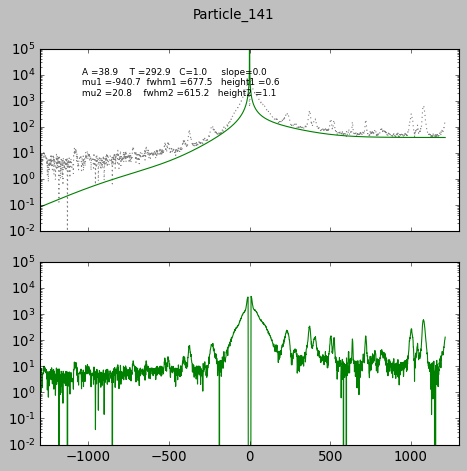

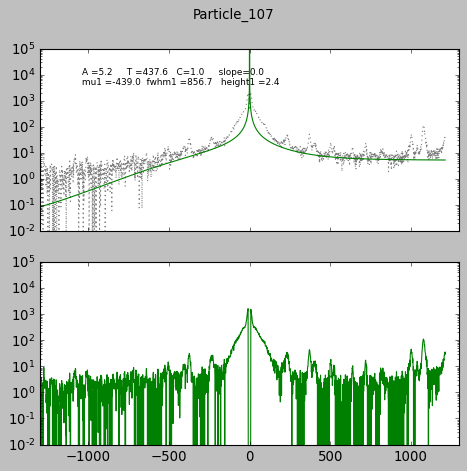

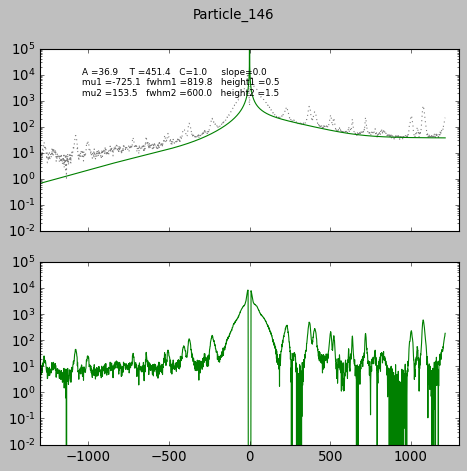

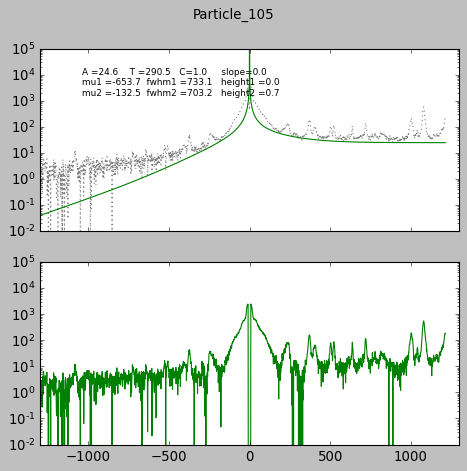

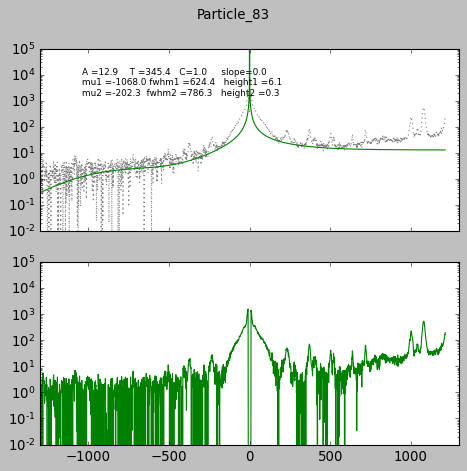

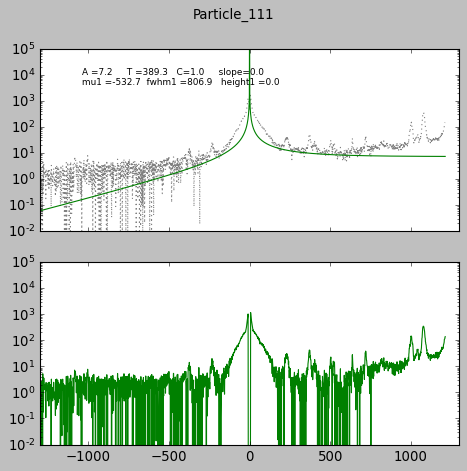

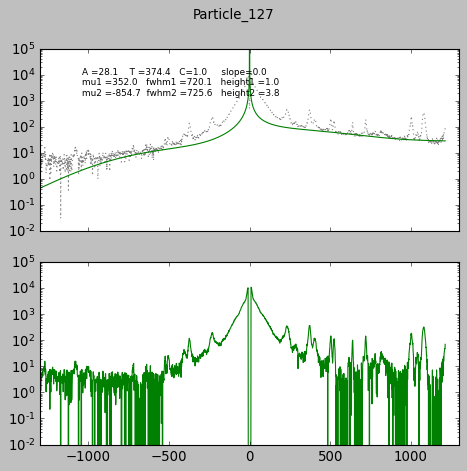

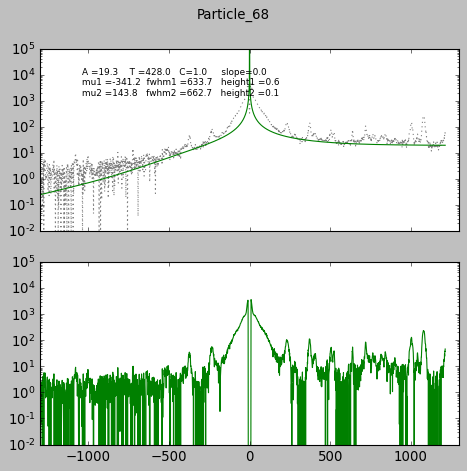

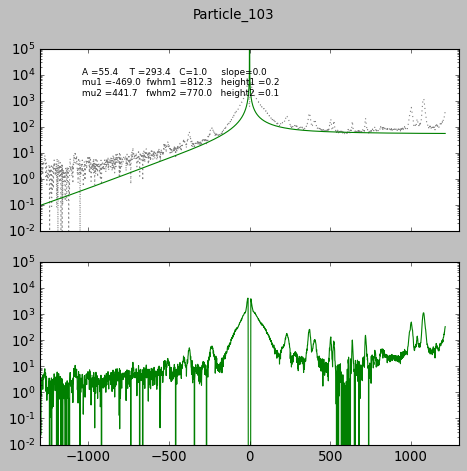

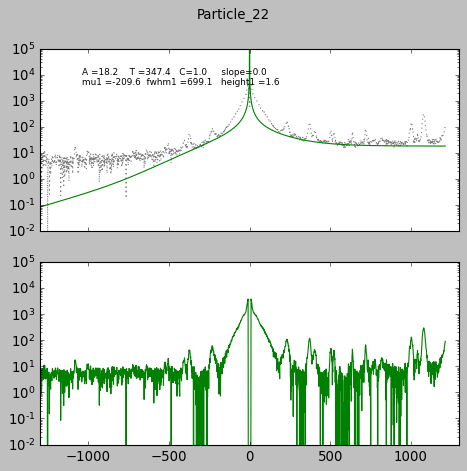

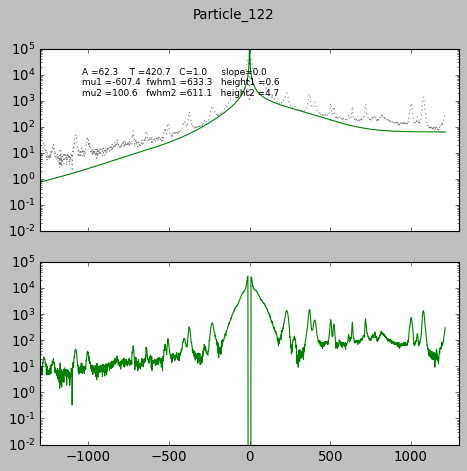

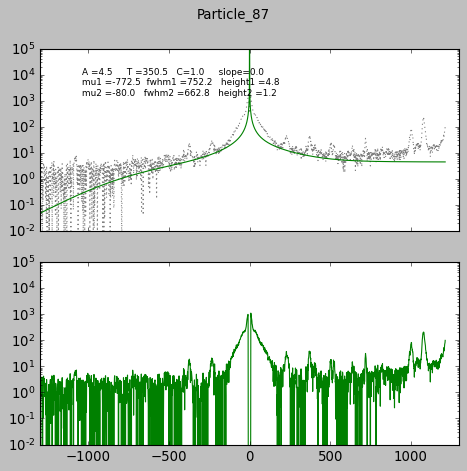

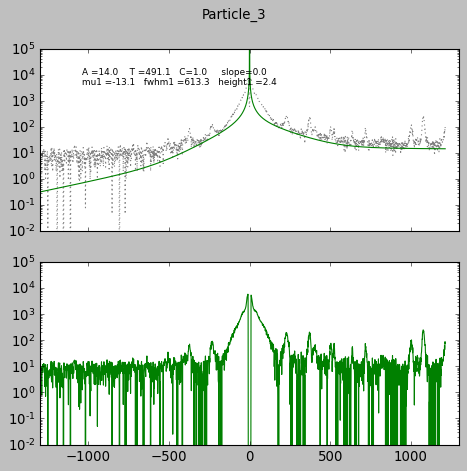

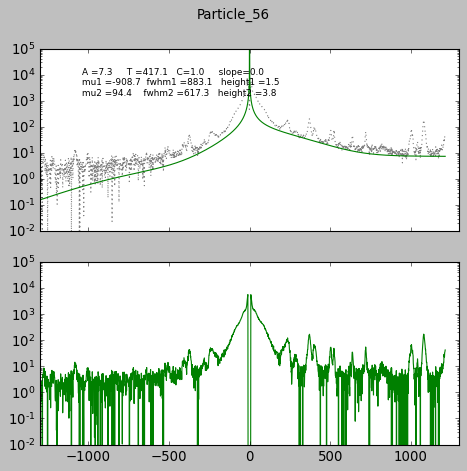

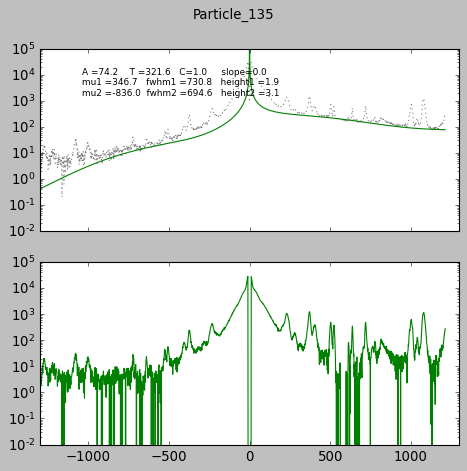

In [185]:
# Plot ERS fits of superselectK
for particle in superselectK:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,6), sharex=True)
    fig.set_tight_layout(True)   
    fig.suptitle(particle)
    ave = centered[particle] 
    Ynew,ERS = ERS_dict[particle]
    axes[0].plot(X,ave,ls=':',color='grey')
    axes[0].plot(X,ERS,color='g')
    axes[1].plot(X,Ynew,color='g')
    for ax in axes:
        ax.set(ylim=[10**-2,10**5],xlim=[-1300,1300],yscale='log')
        
    solution = ERS_params_dict[particle]
    txt = ers.ParamStringFormat(['A ','T ','C','slope','mu1 ','fwhm1 ','height1 ','mu2 ','fwhm2 ','height2 '],solution)
    axes[0].text(0.1,0.9, txt,
    fontsize=8,
    horizontalalignment='left',
    verticalalignment='top',
    transform=axes[0].transAxes)
#     xlim = GetXLim(WN)
        

badfits = []


In [188]:
for particle in badfits:
    if particle in ERS_dict.keys():
        del ERS_dict[particle]
        del ERS_params_dict[particle]
    
print(ba.SortParticles(superselectK),'\n')
for particle in badfits:
    if particle in superselectK:
        superselectK.remove(particle)
print(ba.SortParticles(superselectK),'\n')

['Particle_3', 'Particle_22', 'Particle_56', 'Particle_68', 'Particle_83', 'Particle_87', 'Particle_103', 'Particle_105', 'Particle_107', 'Particle_111', 'Particle_122', 'Particle_127', 'Particle_135', 'Particle_141', 'Particle_146'] 

['Particle_3', 'Particle_22', 'Particle_56', 'Particle_68', 'Particle_83', 'Particle_87', 'Particle_103', 'Particle_105', 'Particle_107', 'Particle_111', 'Particle_122', 'Particle_127', 'Particle_135', 'Particle_141', 'Particle_146'] 



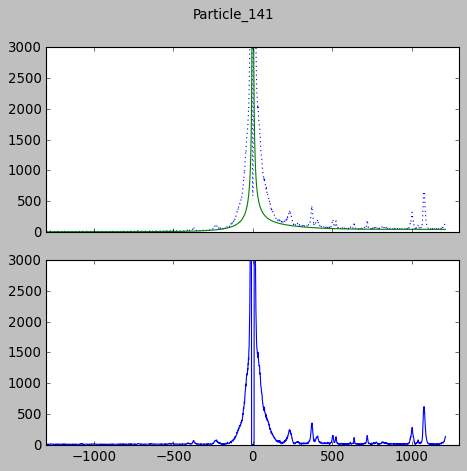

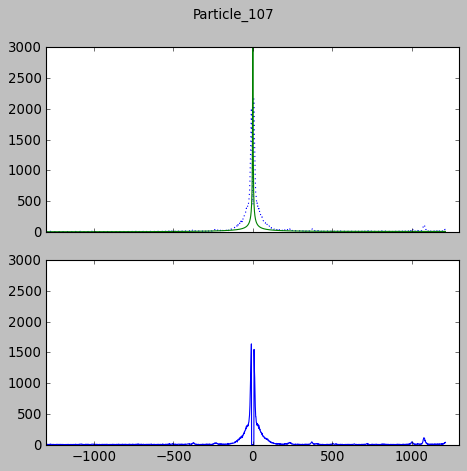

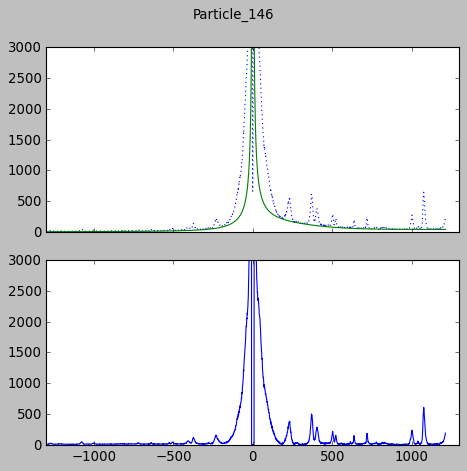

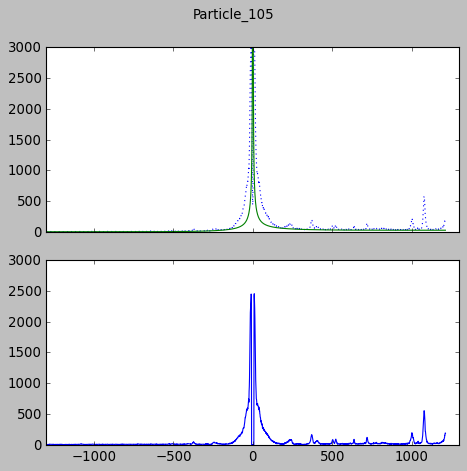

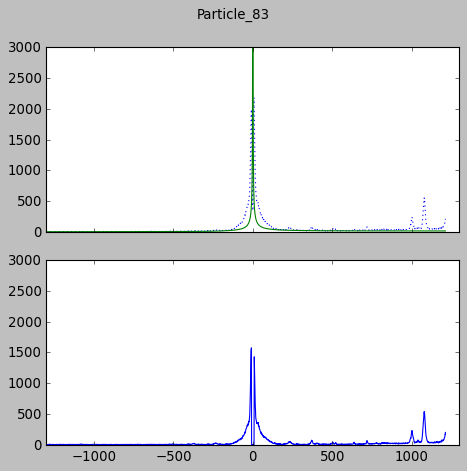

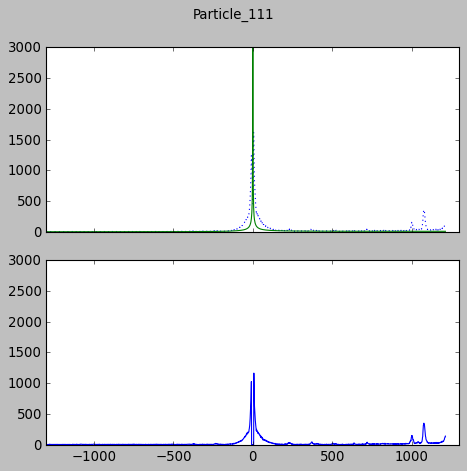

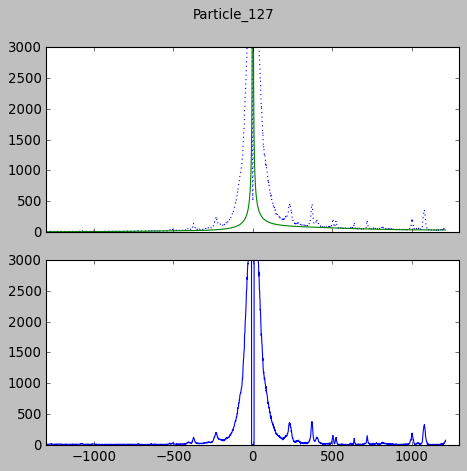

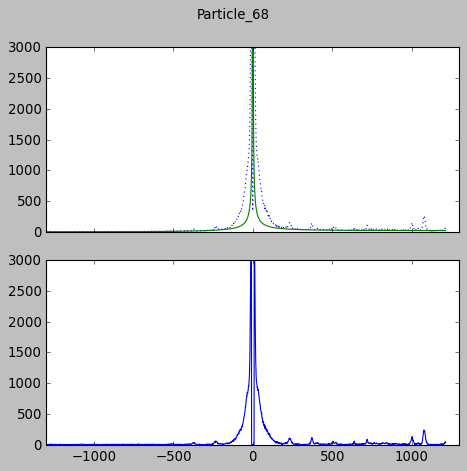

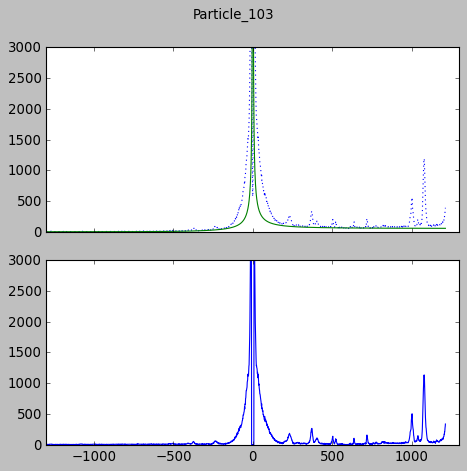

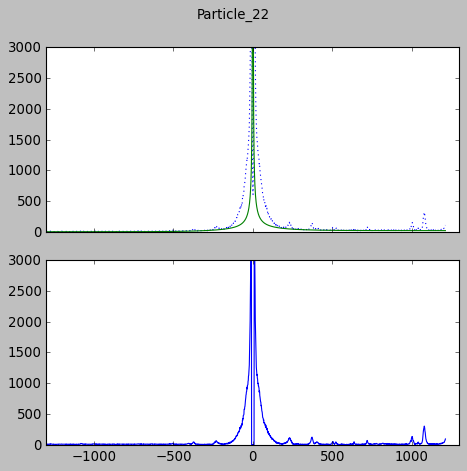

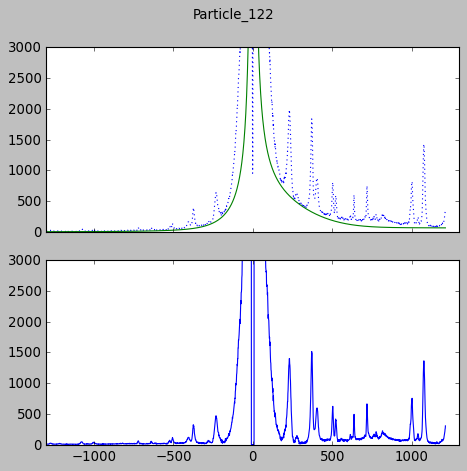

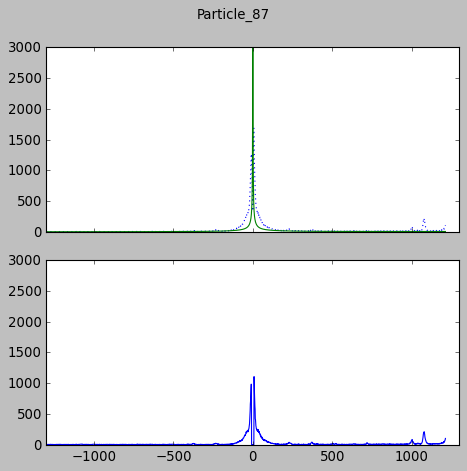

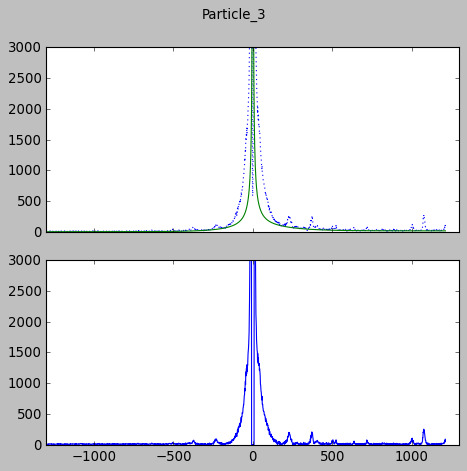

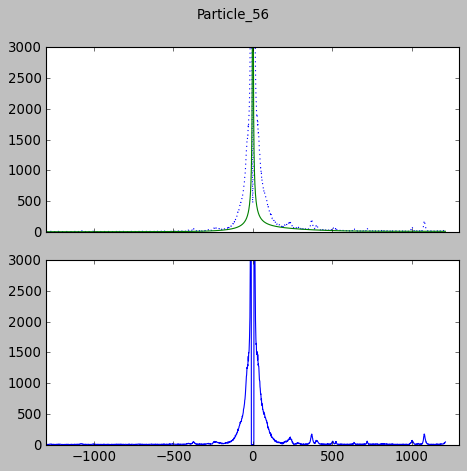

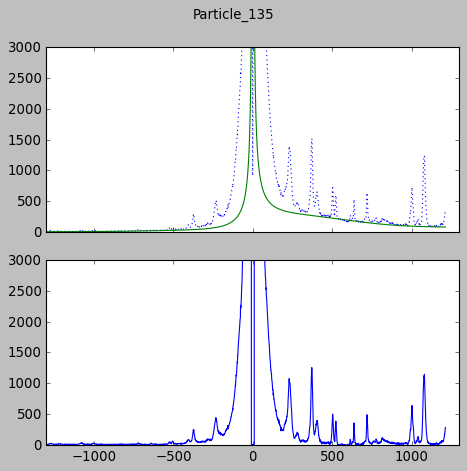

In [189]:
for particle in superselectK:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,6), sharex=True)
    fig.set_tight_layout(True)   
    fig.suptitle(particle)
    ave = centered[particle]
    Ynew,ERS = ERS_dict[particle]
    axes[0].plot(X,ave,ls=':')
    axes[0].plot(X,ERS)
    axes[1].plot(X,Ynew)
    for ax in axes:
        ax.set(ylim=[0,3000],xlim=[-1300,1300],yscale='linear')

Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404
Reduce Noise -35.195003865990614 34.997299146352404


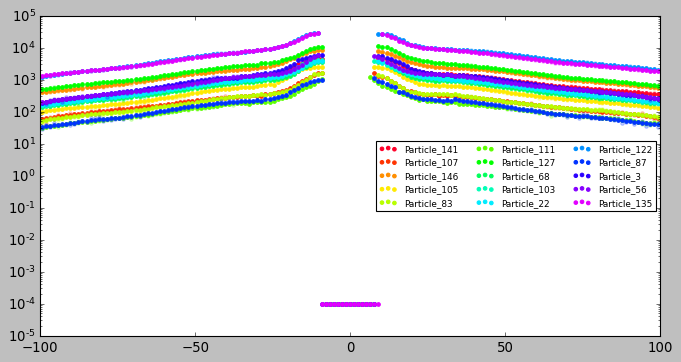

In [192]:
#test center is removed cleanly when subtracting ERS
fig,ax = plt.subplots(figsize=(10,5))
colors = ba.CreateColorsList(len(superselectK))
for p,particle in enumerate(superselectK):
#     fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,6), sharex=True)
#     fig.set_tight_layout(True)   
#     fig.suptitle(particle)
#     ave = centered[particle] 
    Ynew,ERS = ERS_dict[particle]
    Y = ba.ReduceNoise(X,Ynew,25,cutoff = 2000,testing=True)
#     axes[0].plot(X,ave,ls=':',color='grey')
#     axes[0].plot(X,ERS,color='g')
    ax.scatter(X,Ynew,color=colors[p],alpha=0.25,s=10)
    ax.scatter(X,Y,color=colors[p],label=particle,s=10)
#     for ax in axes:
ax.set(ylim=[10**-5,10**5],xlim=[-100,100],yscale='log')
ax.legend(loc='best',fontsize=8,ncol=3)

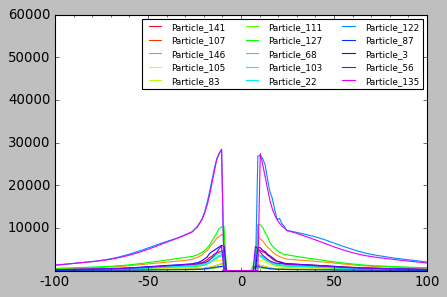

In [193]:
fig,ax = plt.subplots(figsize=(6,4))
colors = ba.CreateColorsList(len(superselectK))
for p,particle in enumerate(superselectK):
    Ynew,ERS = ERS_dict[particle]
    Y = ba.ReduceNoise(X,Ynew,15,cutoff = 2000)
    ax.plot(X,Ynew,color=colors[p],alpha=0.25,ls=':')
    ax.plot(X,Y,color=colors[p],label=particle)
ax.set(ylim=[10**-5,6*10**4],xlim=[-100,100],yscale='linear')
ax.legend(loc='best',fontsize=8,ncol=3)

ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(10))

In [194]:
plt.close('all')

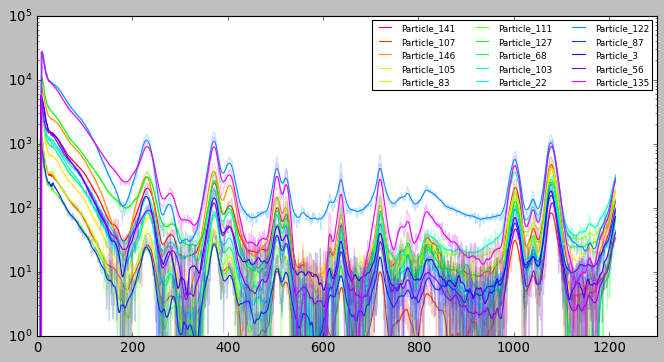

In [196]:
fig,ax = plt.subplots(figsize=(10,5))
colors = ba.CreateColorsList(len(superselectK))
for p,particle in enumerate(superselectK):
    Ynew,ERS = ERS_dict[particle]
    Y = ba.ReduceNoise(X,Ynew,25,cutoff = 2000)
    ax.plot(X,Ynew,color=colors[p],alpha=0.25)
    ax.plot(X,Y,color=colors[p],label=particle)
ax.set(ylim=[10**0,10**5],xlim=[0,1300],yscale='log')
ax.legend(loc='best',fontsize=8,ncol=3)

['Particle_141', 'Particle_107', 'Particle_146', 'Particle_105', 'Particle_83', 'Particle_111', 'Particle_127', 'Particle_68', 'Particle_103', 'Particle_22', 'Particle_122', 'Particle_87', 'Particle_3', 'Particle_56', 'Particle_135']


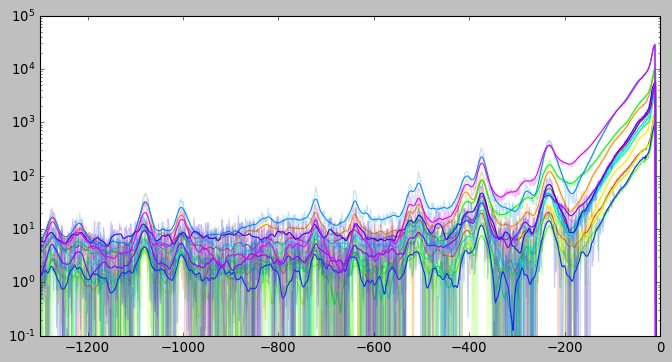

In [197]:
fig,ax = plt.subplots(figsize=(10,5))
colors = ba.CreateColorsList(len(superselectK))
for p,particle in enumerate(superselectK):
    Ynew,ERS = ERS_dict[particle]
    Y = ba.ReduceNoise(X,Ynew,25,cutoff = 2000)
    ax.plot(X,Ynew,color=colors[p],alpha=0.25)
    ax.plot(X,Y,color=colors[p])
ax.set(ylim=[10**-1,10**5],xlim=[-1300,0],yscale='log')

print(superselectK)

In [7]:
# mode = 'nano'

In [198]:
plt.close('all')


#  exponential fit
Exp_dict = {}
Exp_param_dict = {}

In [ ]:
# For now, only applying exponential fit to Stokes side

TPT Particle_141 
 
*** TPT_Particle_141_nano ***


C:\Users\aboeh\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_141_nano_2fittingExponential_06.png


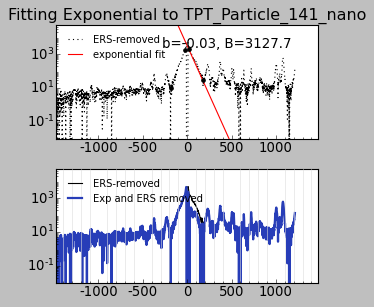

TPT Particle_107 
 
*** TPT_Particle_107_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_107_nano_2fittingExponential_06.png


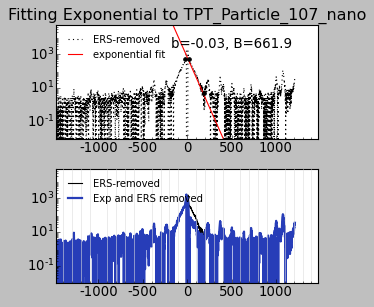

TPT Particle_146 
 
*** TPT_Particle_146_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_146_nano_2fittingExponential_06.png


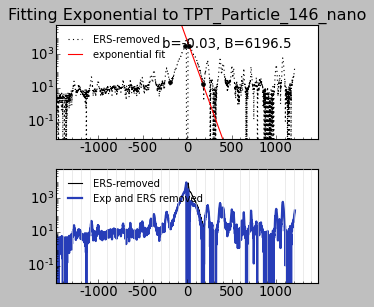

TPT Particle_105 
 
*** TPT_Particle_105_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_105_nano_2fittingExponential_06.png


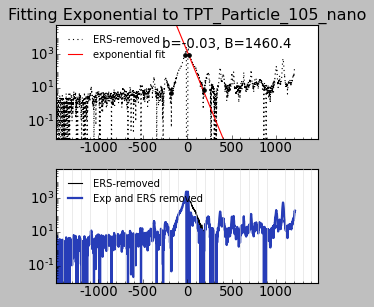

TPT Particle_83 
 
*** TPT_Particle_83_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_83_nano_2fittingExponential_06.png


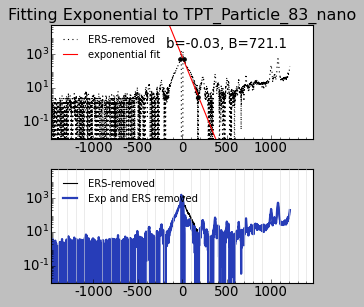

TPT Particle_111 
 
*** TPT_Particle_111_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_111_nano_2fittingExponential_06.png


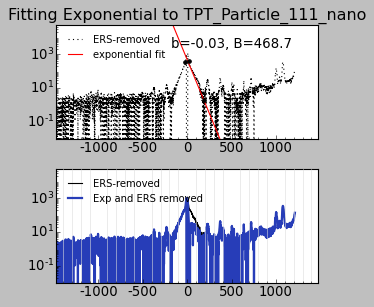

TPT Particle_127 
 
*** TPT_Particle_127_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_127_nano_2fittingExponential_06.png


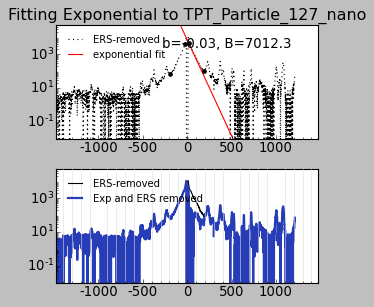

TPT Particle_68 
 
*** TPT_Particle_68_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_68_nano_2fittingExponential_06.png


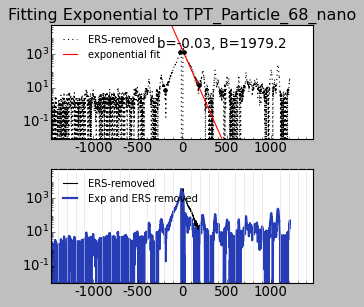

TPT Particle_103 
 
*** TPT_Particle_103_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_103_nano_2fittingExponential_06.png


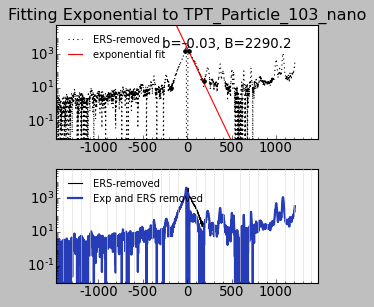

TPT Particle_22 
 
*** TPT_Particle_22_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_22_nano_2fittingExponential_06.png


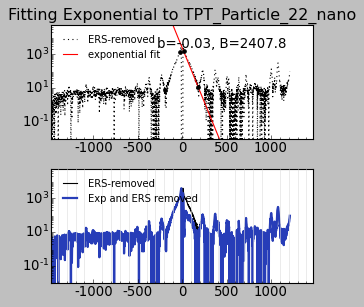

TPT Particle_122 
 
*** TPT_Particle_122_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_122_nano_2fittingExponential_06.png


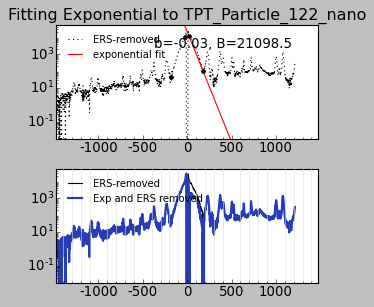

TPT Particle_87 
 
*** TPT_Particle_87_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_87_nano_2fittingExponential_06.png


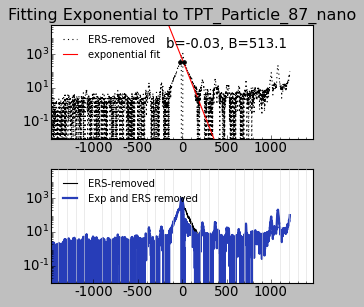

TPT Particle_3 
 
*** TPT_Particle_3_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_3_nano_2fittingExponential_06.png


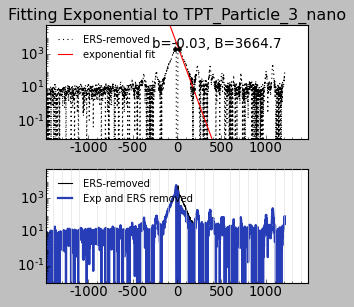

TPT Particle_56 
 
*** TPT_Particle_56_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_56_nano_2fittingExponential_06.png


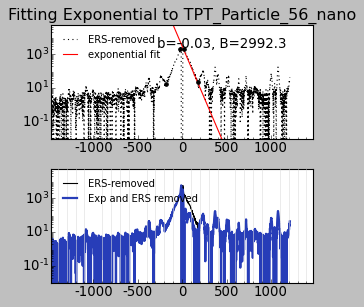

TPT Particle_135 
 
*** TPT_Particle_135_nano ***
MEOWOEMOWMEOWMEOWMOE
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/Expfit/TPT_Particle_135_nano_2fittingExponential_06.png


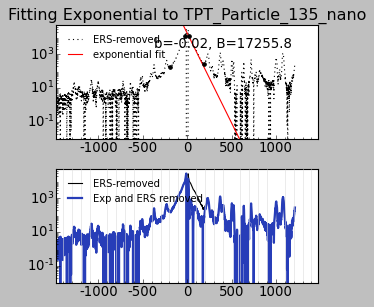

In [199]:
df_testing = False
ers_testing = False
exp_testing = False


Title = 'Exponential below 200 cm-1 removed'

# t0 = process_time() # seconds
for p,particle in enumerate(superselectK): #corrected_dict.keys()): #enumerate(selectK):
# for p,particle in enumerate([exp_badfits[4]]):
    print(analyte, particle, '\n ')
    Ynew,ERS = ERS_dict[particle]
    
    title = analyte + '_' + particle + '_' + mode


    ylim = [10**-1,np.max(Ynew)]#1.5*10**4] # for SpectrumWithoutPeaks

    peak_params=(10.,10.,10.)#(10.,50.,5.) # height,prominence, base width

    WN_nonotch,Ynewnewnew,fit_params = exp.RemoveExponential(pth,folder+'Figs/',title,X,Ynew,
                                                                         peak_params,ylim,#eps=0,
                                                             plot=True,testing=exp_testing)

    Exp_dict[particle] = WN_nonotch,Ynewnewnew #WN_final,Y_final #

    Exp_param_dict[particle] = fit_params#b        


In [200]:
# Visually inspecting spectra after subtracting exponential fit

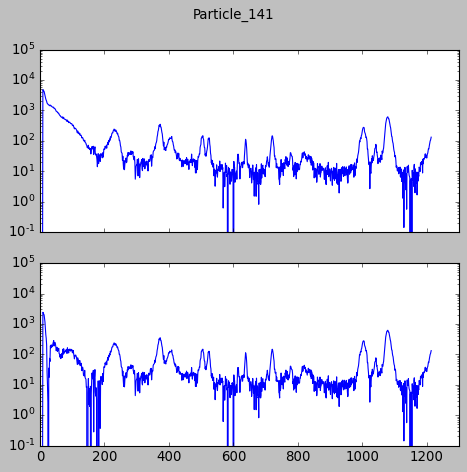

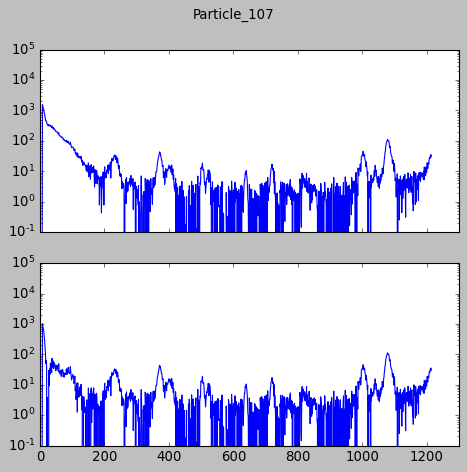

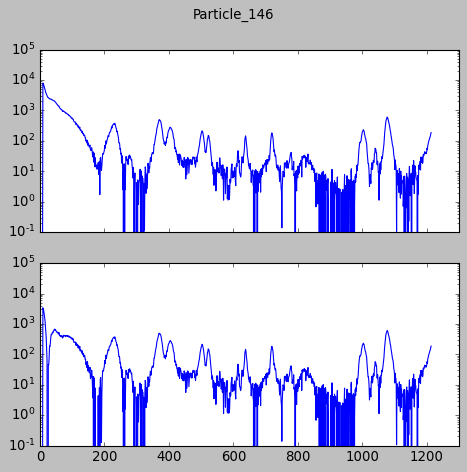

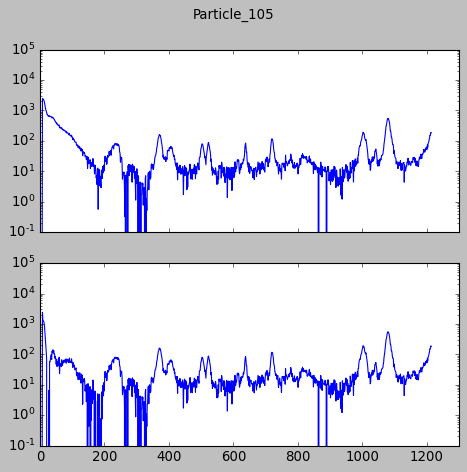

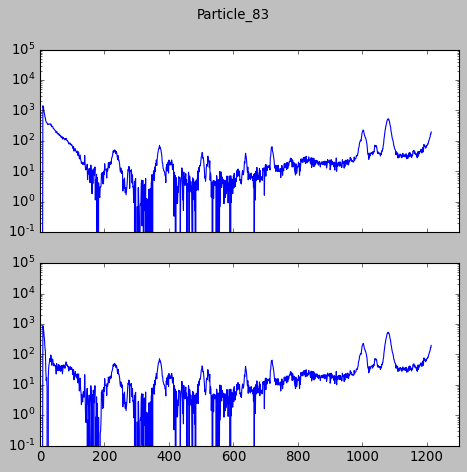

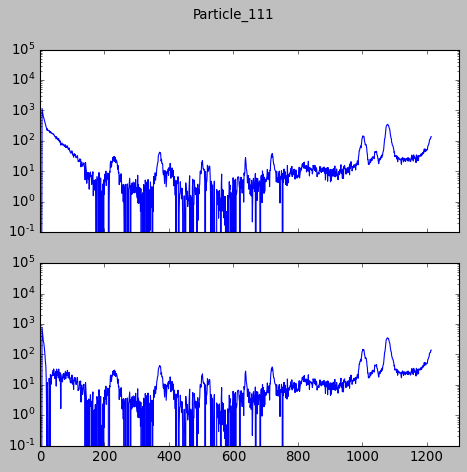

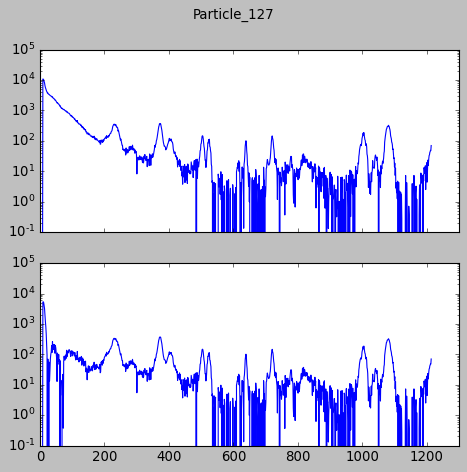

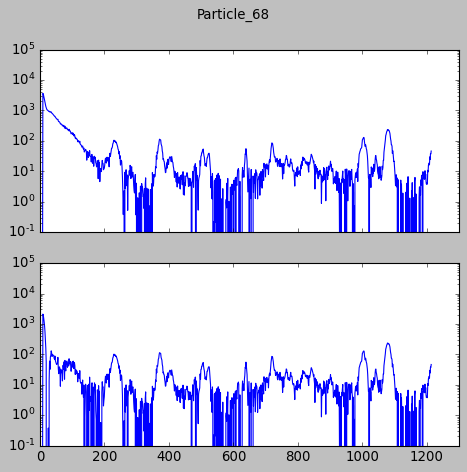

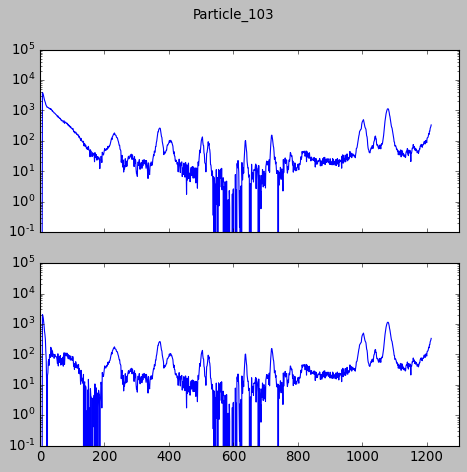

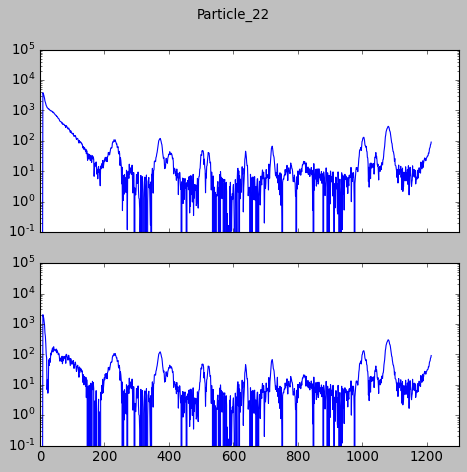

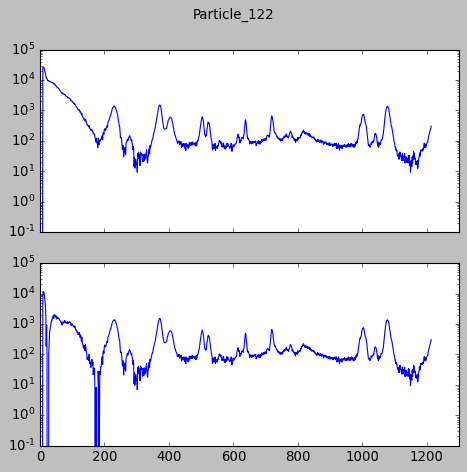

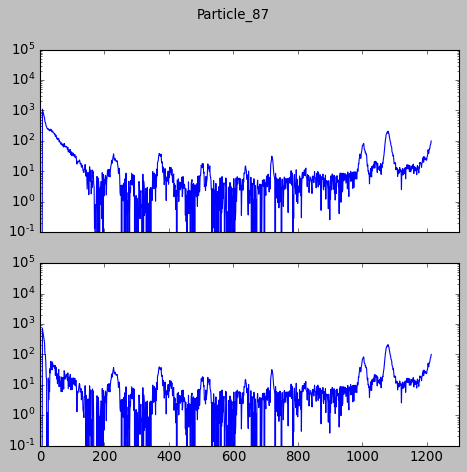

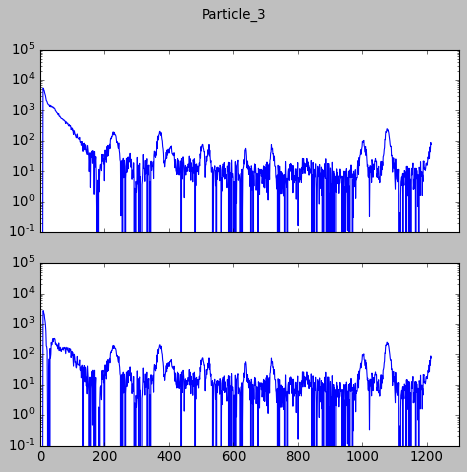

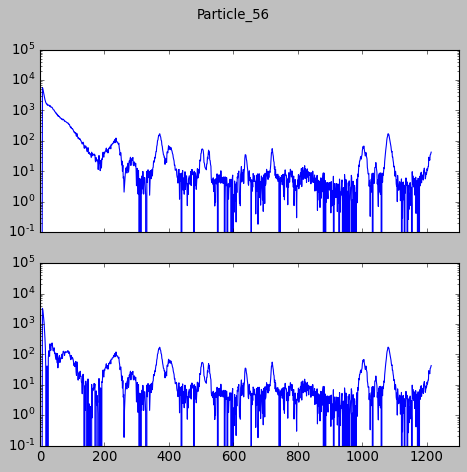

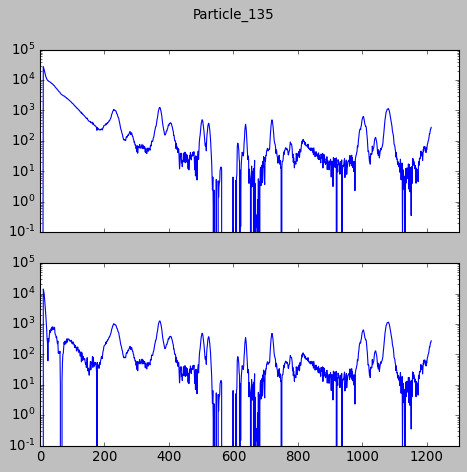

In [202]:
for particle in ERS_dict.keys():
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,6), sharex=True)
    fig.set_tight_layout(True)   
    fig.suptitle(particle)
#     ave = centered[particle]
    Ynew,ERS = ERS_dict[particle]
#     Ynewnew = corrected_dict[particle]
    X_nonotch,Ynewnewnew = Exp_dict[particle] 
#     axes[0].plot(X,ave,ls=':')
#     axes[0].plot(X,ERS)
    axes[0].plot(X,Ynew)
#     axes[0].plot(X,Ynewnew,ls=':')
    axes[1].plot(X_nonotch,Ynewnewnew)
    for ax in axes:
        ax.set(ylim=[0.1,10**5],xlim=[0,1300],yscale='log')

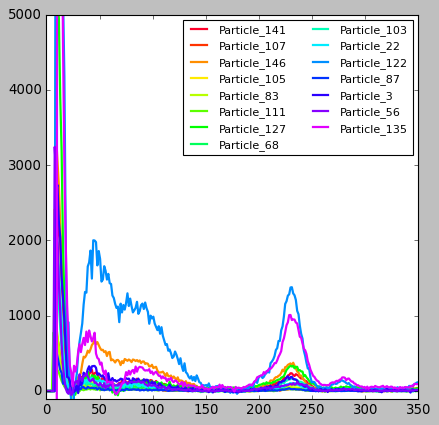

In [203]:
colors = ba.CreateColorsList(len(superselectK),colormap='gist_rainbow')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
for p,particle in enumerate(superselectK):# ERS_dict.keys():
#     ave = centered[particle]
#     Ynew,ERS = ERS_dict[particle]
#     Ynewnew = corrected_dict[particle]
    X_nonotch,Ynewnewnew = Exp_dict[particle] 
#     axes[0].plot(X,ave,ls=':')
#     axes[0].plot(X,ERS)
#     axes[0].plot(X,Ynew)
#     axes[0].plot(X,Ynewnew,ls=':')
    ax.plot(X_nonotch,Ynewnewnew,color=colors[p],lw=2,label=particle)
ax.set(ylim=[-100,5*10**3],xlim=[0,350],yscale='linear')
ax.legend(loc='best',fontsize=10,ncol=2)


In [204]:
badfits_exp = []

for particle in badfits_exp:
    if particle in Exp_dict.keys():
        del Exp_dict[particle]
        del Exp_param_dict[particle]
        
print(ba.SortParticles(superselectK),'\n')
for particle in badfits_exp:
    superselectK.remove(particle)
print(ba.SortParticles(superselectK),'\n')

['Particle_3', 'Particle_22', 'Particle_56', 'Particle_68', 'Particle_83', 'Particle_87', 'Particle_103', 'Particle_105', 'Particle_107', 'Particle_111', 'Particle_122', 'Particle_127', 'Particle_135', 'Particle_141', 'Particle_146'] 

['Particle_3', 'Particle_22', 'Particle_56', 'Particle_68', 'Particle_83', 'Particle_87', 'Particle_103', 'Particle_105', 'Particle_107', 'Particle_111', 'Particle_122', 'Particle_127', 'Particle_135', 'Particle_141', 'Particle_146'] 



In [205]:
plt.close('all')

In [ ]:
# Plot fit parameters

In [206]:
params_dict0 = {
'ERS Stokes height':{'lst':[]},
'T':{'lst':[]},
'-invb':{'lst':[]},
'exp coeff':{'lst':[]}
                }
for p,particle in enumerate(superselectK):
    initial_params = ERS_initial_params_dict[particle] #= initial_state # Stokes_height = initial_state[0]
    solution = ERS_params_dict[particle]
    fit_params = Exp_param_dict[particle]
    b = fit_params[0]
    invb = -1/b # cm-1 

    params_dict0['ERS Stokes height']['lst'].append(initial_params[0])
    params_dict0['T']['lst'].append(solution[1])
    params_dict0['-invb']['lst'].append(invb)
    params_dict0['exp coeff']['lst'].append(fit_params[1])

for param in params_dict0.keys():
    params_dict0[param]['mean'] = np.mean(params_dict0[param]['lst'])
    params_dict0[param]['1std'] = np.std(params_dict0[param]['lst'])

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/TPT_params.png


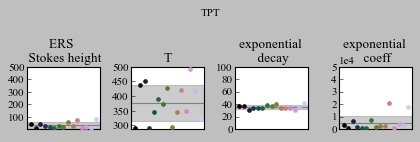

In [212]:
colors = ba.CreateColorsList(len(superselectK)+2,colormap='cubehelix')
thesis = True




fig, axes = plt.subplots(figsize=(13.6*cm,4.5*cm),ncols=4)
fig.suptitle(analyte)

for p,particle in enumerate(superselectK):
    initial_params = ERS_initial_params_dict[particle] #= initial_state # Stokes_height = initial_state[0]
    solution = ERS_params_dict[particle]
    fit_params = Exp_param_dict[particle]
    b = fit_params[0]
    invb = -1/b # cm-1 
    axes[0].scatter(p,initial_params[0],s=10,color=colors[p],zorder=3)
    axes[1].scatter(p,solution[1],s=10,color=colors[p],zorder=3)
    axes[2].scatter(p,invb,s=10,color=colors[p],zorder=3)
    axes[3].scatter(p,fit_params[1],s=10,color=colors[p],zorder=3)

x_plt = range(-1,p+2)
for a,param in enumerate(params_dict0.keys()):
    Mean = np.ones(len(x_plt)) * params_dict0[param]['mean']
    axes[a].plot(x_plt,Mean,color='grey',zorder=2)
    axes[a].fill_between(x_plt,Mean-(1*params_dict0[param]['1std']),Mean+(1*params_dict0[param]['1std']),
                         color='grey',edgecolor='face',alpha=0.4,zorder=1)

    
axes[0].set(title='ERS \n Stokes height',ylim=[1,500],xlim=[-1,p+1])
axes[1].set(title='T',ylim=[288,500],xlim=[-1,p+1])#341])
axes[2].set(title='exponential \n decay',ylim=[0,100],xlim=[-1,p+1])
axes[3].set(title='exponential \n coeff',ylim=[0,5*10**4],xlim=[-1,p+1])
axes[3].ticklabel_format(axis='y',style='sci',scilimits=(0,0))

if thesis:
    for ax in axes:
        ax.set_xticks([])
        ax.set_xticklabels([])
        #ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.tick_params(axis='both', which='major', pad=2)
else:
    x = list(range(len(particles)))
    for ax in axes:
        ax.set_xticks(x,particles,rotation=90,ha='center')
fig.set_tight_layout(True) 

# # folder = hdf5filename.split('.')[0].split('_')[0] + '/'
filename = pth + folder + 'Figs/' + analyte + '_params' + '.png'
print(filename)
ba.ensure_dir(filename)
# plt.savefig(filename,format='png',bbox_inches='tight',transparent=True,dpi=300)

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/TPT_params_exp_coeff_over_ERS_Stokes_height.png
145.72422287015704 94.65312444383322


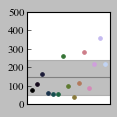

In [215]:
# RATIO

fig, ax = plt.subplots(figsize=(4*cm,4*cm))
R = []
for p,particle in enumerate(superselectK):
    initial_params = ERS_initial_params_dict[particle] #= initial_state # Stokes_height = initial_state[0]
    fit_params = Exp_param_dict[particle]
    ratio2 = fit_params[1] / initial_params[0] # exp coeff / Stokes height
    ax.scatter(p,ratio2,s=10,color=colors[p],zorder=3)
    R.append(ratio2)
meow = range(-2,len(superselectK)+2)
Mean = np.ones(len(meow))*np.mean(R)
std = np.std(R)
ax.plot(meow,Mean,color='grey',lw=1,zorder=2)
ax.fill_between(meow,Mean-std,Mean+std,color='grey',edgecolor='face',alpha=0.5,zorder=1)

ax.set(xlim=[-1,len(superselectK)],ylim=[0,500])#np.max(R)])
if thesis:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='both', which='major', pad=2)
else:
    x = list(range(len(superselectK)))
    ax.set_xticks(x,superselectK,rotation=90,ha='center')

ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', which='major', pad=2)


plt.tight_layout()

filename = pth + folder + 'Figs/' + analyte + '_params_exp_coeff_over_ERS_Stokes_height' + '.png'
print(filename)
ba.ensure_dir(filename)
# plt.savefig(filename,format='png',bbox_inches='tight',transparent=True,dpi=300)

print(np.mean(R),np.std(R))

mx 28460.376294052523
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/raw data/Figs/TPT_nano.png


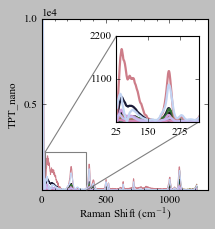

In [221]:
Title = analyte + '_' + mode

fig, ax1 = plt.subplots(figsize=(6.8*cm,6.8*cm))
# fig.suptitle(Title)
ax2 = plt.axes([0,0,1,1])


for c,particle in enumerate(superselectK): 
    X_nonotch,Ynewnewnew = Exp_dict[particle] 
    Y_smthd = ba.ReduceNoise(X_nonotch,Ynewnewnew,5,cutoff = 5000)
    ax1.plot(X_nonotch,Ynewnewnew,color=colors[c])
    ax2.plot(X_nonotch, Y_smthd,color=colors[c],lw=2)

# ax1.plot(X_nonotch,Ynewnewnew)
ax1.set_xlabel(r'')
ax1.set_ylabel(r'')
print('mx',np.max(Ynewnewnew))
ylim = [0,10000]
ax1.set(xlim=[0,1300],ylim=ylim,xlabel='Raman Shift (cm$^{-1}$)',ylabel=Title)#,title=Title)##2500
ax1.xaxis.labelpad = 0.1
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax1.set_yticks([ylim[1]/2,ylim[1]])
ax1.xaxis.set_major_locator(MultipleLocator(500))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.xaxis.set_minor_locator(MultipleLocator(100))

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
# ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.45,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
                          #2

# The data: only display for low temperature in the inset figure.
# cutoff = 300
# ax2.plot(X_nonotch[X_nonotch<=cutoff], Ynewnewnew[X_nonotch<=cutoff])
# ax2.plot(X_nonotch, Ynewnewnew)
ylim = [0,2200]
ax2.set(xlim=[25,350],ylim=ylim)#2000
# ax2.legend(loc=0)

# # Some ad hoc tweaks.
# ax1.set_ylim(0,26)
ax2.set_yticks([ylim[1]/2,ylim[1]])
ax2.set_xticks(np.arange(25,350,125))
# ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
# ax2.tick_params(axis='x', which='major', pad=8)

figname = pth+folder+'Figs/'+Title+'.png'
print(figname)
ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)